# MUNICIPIOS

## **Recolección de datos**

La recolección de datos, se llevó acabo cin duferentes fuentes, desde el DANE, la gobernación de Boyacá, y otras fuentes.
A continuación alfunas de las fuentes:
* https://www.datos.gov.co/Agricultura-y-Desarrollo-Rural/Evaluaciones-Agropecuarias-por-consenso-DEPARTAMEN/u958-pr9h/data_preview
* https://microdatos.dane.gov.co/index.php/catalog/643/get-microdata
* https://telencuestas.com/censos-de-poblacion/colombia/2023/boyaca
* https://www.contaduria.gov.co/documents/20127/36288/CT01+Categorizacion.xlsx/1472165e-1623-e2db-fc5e-8378a610b7e1
* https://www.dane.gov.co/index.php/estadisticas-por-tema/cuentas-nacionales/cuentas-nacionales-departamentales

De esa forma se obtuvieron las siguientes variables:
* ***Nombre*** :  nombre del municipio al que hace referencia el conjunto de datos
* ***Provincia*** : Indica la provincia a la que pertenece el municipio referenciado en el conjunto de datos.
* ***Año de Fundación*** : año oficial en el que el municipio fue fundado.
* ***Altitud*** : elevación sobre el nivel del mar del muncipio, en metros sobre el nivel del mar.
* ***Área*** : indica la extensión o superficie terrestre cubierta por el municipio.
* ***Población Total 2023*** : Número total de residentes proyectados por el DANE para el 2023
* ***Hombres*** : Total de hombres que residen en el municipio proyectados por el DANE para el 2023
* ***Mujeres*** : Total de mujeres que residen en el municipio proyectados por el DANE para el 2023
* ***Valor agregado al PIB*** : contribución económica agregada de un municipio específico al Producto Interno Bruto (PIB) del departamento al que pertenece.
* ***Actividades Primarias*** : valor agregado generado por las actividades primarias (agricultura, ganadería, pesca, etc.) en el contexto del municipio.
* ***Actividades Secundarias*** : valor agregado generado por las actividades secundarias (industria manufacturera, construcción, etc.) en el contexto del municipio.
* ***Actividades Terciarias*** : valor agregado generado por las actividades terciarias (servicios, comercio, turismo, etc.) en el contexto de un municipio específico
* ***# Promedio empresas 2021*** : el número promedio de empresas activas en un municipio específico durante el 2021 en cada municipio.
* ***# promedio trabajadores 2021*** : número de trabajadores empleados en un municipio específico durante el año 2021
* ***Promedio de trabajadores por empresa 2021*** : número de trabajadores empleados por empresa en un municipio específico durante el año 2021.
* ***Población en edad laboral 2021*** : número total de personas dentro del rango de edad laboral (15 a 64 años) en un municipio específico durante el año 2021.
* ***Area_Cosechada_2019 km2**: Área cosechada en kilometros cuadrados en cultivos diferentes a la papa en el 2019, tanto en cultivos permanentes como de temporada.
* ***Area_Cosechada_Papa_2019 km2*** : Área cosechada en kilometros cuadrados en cultivos de papa (todo tipo de papa) en el 2019 en los dos semestres.
* ***Produccion_Papa_2019 (t)*** : Toneladas de papas sacadas de la producción en el 2019.
* ***Instituciones_Publicas_2021*** : cantidad de instituciones públicas en cada municipio.
* ***Instituciones_Privadas_2021*** : cantidad de instituciones privadas en cada municipio.
* ***Total_Instituciones_2021*** : cantidad de instituciones públicas y privadas en cada municipio.
* ***2021_Oficial_Matriculados*** : cantidad de personas matriculas en instituciones públicas durante el 2021.
* ***2021_Privado_Matriculados*** : cantidad de personas matriculas en instituciones privadas durante el 2021.
* ***2021_Total_Matriculadose*** : cantidad de personas matriculas en instituciones públicas y privadas durante el 2021.
* ***Promedio_Puntaje_Global_2021*** : promedio del puntaje de icfes de los estudiantes que lo presentaron en el 2021 en los dos semestres.
* ***Comparación_PG_departamental_2021*** : comparación del promedio de cada municipio al promedio global del departamento
* ***Desviación_2021*** : la variabilidad o discrepancia en los puntajes obtenidos por los estudiantes en las pruebas estandarizadas del ICFES en el municipio.
* ***Comparación_DPG_departamental_2021*** : comparación de la variabilidad del puntaje en cada municipio, a la variabilidad del departamento en los puntajes
* ***Categoría*** : la categoría de un municipio se determina principalmente por su población y su nivel de desarrollo económico.

In [ ]:
pip install mapclassify>=2.4.0

In [ ]:
pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 3.7 MB/s eta 0:00:00


Importación de librerías

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from unidecode import unidecode

In [ ]:
# Trabajar con Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Lectura de archivos**

In [ ]:
# Cargar archivo para las categorias de edades
cat = pd.read_excel("/content/drive/MyDrive/Libro3.xlsx")
 # Elimina dobles espacios en blanco
cat['Municipio'] = cat['Municipio'].str.strip()
# Corregir nombres de municipios en ortografía, tildes, o abreviaturas para poder hacer el merge
cat['Municipio'] = cat['Municipio'].replace("GUICAN", "GÜICÁN DE LA SIERRA")
cat['Municipio'] = cat['Municipio'].replace("TUTASA", "TUTAZÁ")
cat['Municipio'] = cat['Municipio'].replace("PAZ DEL RIO", "PAZ DE RIO")
cat['Municipio'] = cat['Municipio'].replace("VILLA DE LEIVA", "VILLA DE LEYVA")
#  Eliminar los acentos y caracteres especiales.
cat['Municipio'] = cat['Municipio'].apply(unidecode)
cat

Código CGN       Municipio                  Nombre  Población DANE  \
0     212215022         ALMEIDA  DEPARTAMENTO DE BOYACA            1997   
1     214715047       AQUITANIA  DEPARTAMENTO DE BOYACA           16141   
2     215115051        ARCABUCO  DEPARTAMENTO DE BOYACA            6179   
3     218715087           BELEN  DEPARTAMENTO DE BOYACA            7841   
4     219015090          BERBEO  DEPARTAMENTO DE BOYACA            1653   
..          ...             ...                     ...             ...   
118   214215842          UMBITA  DEPARTAMENTO DE BOYACA            7878   
119   216115861    VENTAQUEMADA  DEPARTAMENTO DE BOYACA           16662   
120   210715407  VILLA DE LEYVA  DEPARTAMENTO DE BOYACA           17282   
121   217915879       VIRACACHA  DEPARTAMENTO DE BOYACA            2946   
122   219715897       ZETAQUIRA  DEPARTAMENTO DE BOYACA            4832   

     Categoría  
0            6  
1            6  
2            6  
3            6  
4            6  
..         ...  
118          6  
119          6  
120          6  
121          6  
122          6  

[123 rows x 5 columns]

In [ ]:
# Cargar archivo con los otros datos recolectados
url = "/content/drive/MyDrive/Boyaca.xlsx"
df = pd.read_excel(url)
#  Eliminar los acentos y caracteres especiales.
df['Nombre'] = df['Nombre'].apply(unidecode)
df

Nombre  Provincia Año de fundación  Altitud (m.s.n.m.)  Área (km²)  \
0         ALMEIDA    Oriente             1907                1925       57.98   
1           TUNJA     Centro             1539                2678      118.00   
2       AQUITANIA   Sugamuxi             1777                3030      828.00   
3        ARCABUCO   Ricaurte             1856                2575      155.00   
4           BELEN    Tundama             1762                2645      284.60   
..            ...        ...              ...                 ...         ...   
118      TUNUNGUA  Occidente             1962                1246       73.00   
119        TUTAZA    Tundama             1849                2800      135.00   
120  VENTAQUEMADA     Centro             1777                2642      159.30   
121     VIRACACHA    Márquez             1787                2540       64.00   
122     ZETAQUIRA    Lengupá             1745                1665      226.00   

     Poblacion_Total_2023  Hombres_2023  Mujeres_2023  Valor agregado PIB  \
0                    2030          1064           966           30.539092   
1                  185469         87724         97745         4489.080843   
2                   16319          8344          7975          586.002340   
3                    6265          3140          3125          154.098755   
4                    7914          3784          4130          131.867407   
..                    ...           ...           ...                 ...   
118                  1627           888           739          102.955567   
119                  2142          1041          1101           48.584682   
120                 16856          8409          8447          433.886323   
121                  2985          1535          1450           52.132631   
122                  4896          2488          2408           90.877180   

     Actividades terciarias ***  ...  \
0                     16.877709  ...   
1                   3984.951578  ...   
2                    179.023828  ...   
3                     74.362855  ...   
4                     89.508855  ...   
..                          ...  ...   
118                   17.212610  ...   
119                   19.477520  ...   
120                  178.748107  ...   
121                   28.286303  ...   
122                   45.764722  ...   

     Instituciones_Boyaca.Instituciones_Publicas_2021  \
0                                                   1   
1                                                  14   
2                                                   4   
3                                                   1   
4                                                   2   
..                                                ...   
118                                                 1   
119                                                 2   
120                                                 4   
121                                                 1   
122                                                 2   

     Instituciones_Privadas_2021  Total_Instituciones_2021  \
0                              0                         1   
1                            120                       134   
2                              1                         5   
3                              0                         1   
4                              2                         4   
..                           ...                       ...   
118                            0                         1   
119                            0                         2   
120                            3                         7   
121                            0                         1   
122                            0                         2   

     2021_Oficial_Matriculados  2021_Privado_Matriculados  \
0                          207                          0   
1                        23705                      12637   
2                  

In [ ]:
# Verificar que todos los municipios coincidan en los dos datasets para poder unir la información necesaria
condicion = ~df['Nombre'].isin(cat['Municipio'])
# Filtrar las filas de 'df' donde la condición sea verdadera
at = df[condicion]
at

Empty DataFrame
Columns: [Nombre, Provincia, Año de fundación, Altitud (m.s.n.m.), Área (km²), Poblacion_Total_2023, Hombres_2023, Mujeres_2023, Valor agregado PIB, Actividades terciarias ***, Actividades secundarias **, Actividades primarias *, # Promedio empresas 2021, # promedio trabajadores 2021, Promedio de trabajadores por empresa 2021, Población en edad laboral 2021, Area_Cosechada_2019 km2, Area_Cosechada_Papa_2019 km2., Produccion_Papa_2019 (t), Instituciones_Boyaca.Instituciones_Publicas_2021, Instituciones_Privadas_2021, Total_Instituciones_2021, 2021_Oficial_Matriculados, 2021_Privado_Matriculados, 2021_Total_Matriculados, Promedio_Puntaje_Global_2021, Comparación_PG_departamental_2021, Desviación_2021, Comparación_DPG_departamental_2021]
Index: []

[0 rows x 29 columns]

In [ ]:
# Combinar los dos datasets y tomar solo la categoria
df = pd.merge(df, cat[["Categoría"]], left_on=df["Nombre"], right_on=cat["Municipio"])
df.set_index('Nombre', inplace=True)
df = df.drop('key_0', axis =1)
df

Provincia Año de fundación  Altitud (m.s.n.m.)  Área (km²)  \
Nombre                                                                     
ALMEIDA         Oriente             1907                1925       57.98   
TUNJA            Centro             1539                2678      118.00   
AQUITANIA      Sugamuxi             1777                3030      828.00   
ARCABUCO       Ricaurte             1856                2575      155.00   
BELEN           Tundama             1762                2645      284.60   
...                 ...              ...                 ...         ...   
TUNUNGUA      Occidente             1962                1246       73.00   
TUTAZA          Tundama             1849                2800      135.00   
VENTAQUEMADA     Centro             1777                2642      159.30   
VIRACACHA       Márquez             1787                2540       64.00   
ZETAQUIRA       Lengupá             1745                1665      226.00   

              Poblacion_Total_2023  Hombres_2023  Mujeres_2023  \
Nombre                                                           
ALMEIDA                       2030          1064           966   
TUNJA                       185469         87724         97745   
AQUITANIA                    16319          8344          7975   
ARCABUCO                      6265          3140          3125   
BELEN                         7914          3784          4130   
...                            ...           ...           ...   
TUNUNGUA                      1627           888           739   
TUTAZA                        2142          1041          1101   
VENTAQUEMADA                 16856          8409          8447   
VIRACACHA                     2985          1535          1450   
ZETAQUIRA                     4896          2488          2408   

              Valor agregado PIB  Actividades terciarias ***  \
Nombre                                                         
ALMEIDA                30.539092                   16.877709   
TUNJA                4489.080843                 3984.951578   
AQUITANIA             586.002340                  179.023828   
ARCABUCO              154.098755                   74.362855   
BELEN                 131.867407                   89.508855   
...                          ...                         ...   
TUNUNGUA              102.955567                   17.212610   
TUTAZA                 48.584682                   19.477520   
VENTAQUEMADA          433.886323                  178.748107   
VIRACACHA              52.132631                   28.286303   
ZETAQUIRA              90.877180                   45.764722   

              Actividades secundarias **  ...  Instituciones_Privadas_2021  \
Nombre                                    ...                                
ALMEIDA                         2.398276  ...                            0   
TUNJA                         391.780460  ...                          120   
AQUITANIA                      46.270881  ...                            1   
ARCABUCO                       12.344982  ...                            0   
BELEN                          11.915980  ...                            2   
...                                  ...  ...                          ...   
TUNUNGUA                        8.157649  ...                            0   
TUTAZA                          3.823335  ...                            0   
VENTAQUEMADA                   34.362580  ...                            3   
VIRACACHA                       4.154435  ...                            0   
ZETAQUIRA                       7.283170  ...                            0   

              Total_Instituciones_2021  2021_Oficial_Matriculados  \
Nombre                                                              
ALMEIDA                              1                        207   
TUNJA                              134                      23705   
AQUITANIA                            5    

## **LIMPIEZA DE DATOS**

Información general del dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123 entries, ALMEIDA to ZETAQUIRA
Data columns (total 29 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Provincia                                         123 non-null    object 
 1   Año de fundación                                  123 non-null    object 
 2   Altitud (m.s.n.m.)                                123 non-null    int64  
 3   Área (km²)                                        123 non-null    float64
 4   Poblacion_Total_2023                              123 non-null    int64  
 5   Hombres_2023                                      123 non-null    int64  
 6   Mujeres_2023                                      123 non-null    int64  
 7   Valor agregado PIB                                123 non-null    float64
 8   Actividades terciarias ***                        123 non-null    float64
 9   Actividades se

Se observan 29 variables, 4 de ellas string y 25 restantes numéricas. A parte se observa que en las variables relacionadas con la cosecha de papa existen nulos, lo que indica que en estos municipios no hay condiciones para producción de papa lo equivalente a 0 en esas filas.

In [ ]:
# Resivsar espacios nulos
df.isnull().sum()

Provincia                                            0
Año de fundación                                     0
Altitud (m.s.n.m.)                                   0
Área (km²)                                           0
Poblacion_Total_2023                                 0
Hombres_2023                                         0
Mujeres_2023                                         0
Valor agregado PIB                                   0
Actividades terciarias ***                           0
Actividades secundarias **                           0
Actividades primarias *                              0
# Promedio empresas 2021                             0
# promedio trabajadores 2021                         0
Promedio de trabajadores por empresa 2021            0
Población en edad laboral 2021                       0
Area_Cosechada_2019 km2                              4
Area_Cosechada_Papa_2019 km2.                       36
Produccion_Papa_2019 (t)                            36
Institucio

Los nulos se presentan en variables sobre cosecha y producción de papá, por tanto sabemos que los vacíos son cero (sin cosecha o producción)

In [ ]:
df = df.fillna(0)

Posterior al armado de la base de datos final de municipios con sus características escalares, se deberá proceder a aplicar ACP (componentes principales) a la base de datos resultante con el fin de tratar de obtener una reducción de dimensiones de la misma. Las nuevas dimensiones deben ser explicadas en términos del contexto de las variables recogidas, incluyendo medidas y gráficos pertinentes para observar la representación y sus posibles agrupaciones.

## **MODELO DE COMPONENTES PRINCIPALES**

Debemos verificar los supuestos del modelo
*  Sólo se puede hacer con variables numérica
* Para hacer los componentes principales, debe existira una correlación entre las variables.

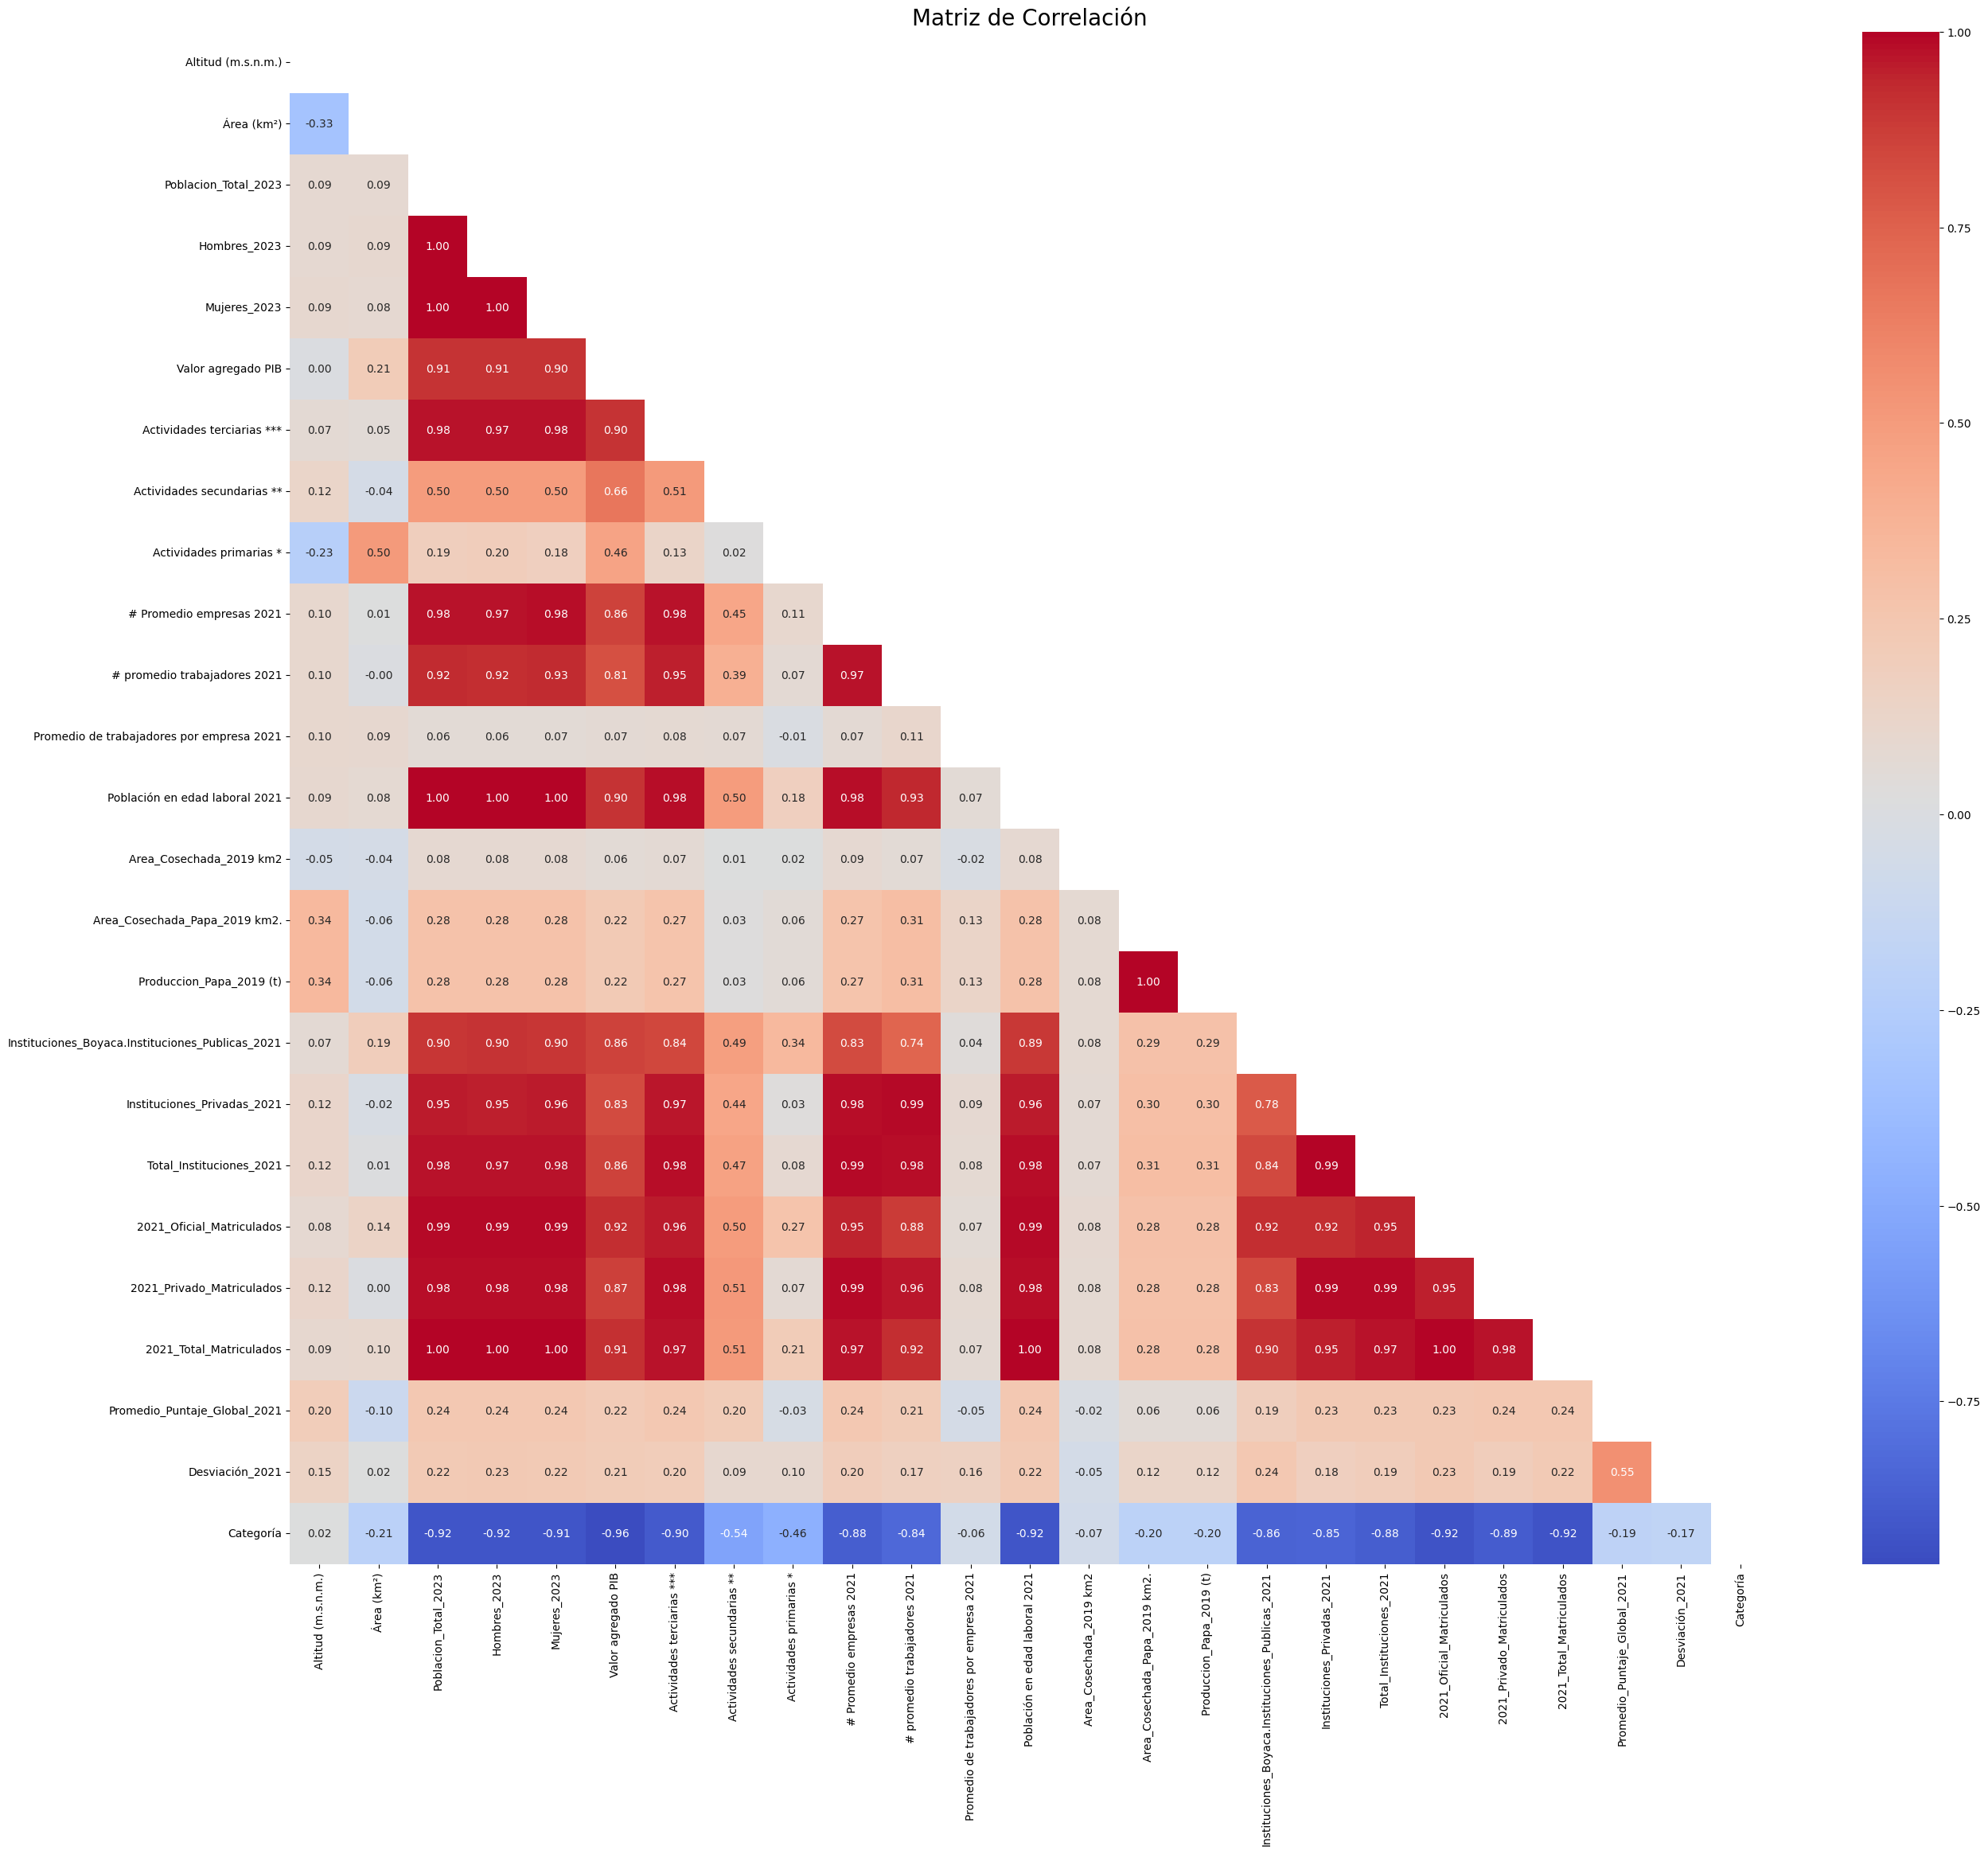

In [ ]:
# Seleccionar variables numéricas
variables_numericas = df.select_dtypes(include=['float64', 'int64'])
correlacion = variables_numericas.corr()

# Graficar la matriz de correlación
plt.figure(figsize=(30, 25))
mask = np.triu(np.ones_like(correlacion, dtype=bool))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)
plt.title('Matriz de Correlación', fontsize=20)
plt.show()

In [ ]:
absolutos = abs(correlacion)
print("La correlación mínima es:",absolutos.min().min())
max_c = absolutos[absolutos != 1]
print("La correlación máxima es:", max_c.max().max())
print("La correlación media del dataframe es:",correlacion.mean().mean())
#correlacion.abs().values.max()

La correlación mínima es: 0.0007772112139631814
La correlación máxima es: 0.9999999999999998
La correlación media del dataframe es: 0.3695814757545203


Observamos de que a pesar de que algunas correlaciones son bajas, por ejemplo la correlación mínima es de 0.0007. Sin embargo, en general se presentan correlación entre las variables, por lo que será posible realizar el análisis de componentes principales.
Como detalle, se observa que la variable d la categoría, es la que tiene más correlación con el resto, comportmaiento esperado por la definición de la variable.

In [ ]:
# Como mencionamos, trabajaremos únicamente con las variables numéricas, las que quedaran guardadas en un nuevo dataframe
variables_numericas

Altitud (m.s.n.m.)  Área (km²)  Poblacion_Total_2023  \
Nombre                                                               
ALMEIDA                     1925       57.98                  2030   
TUNJA                       2678      118.00                185469   
AQUITANIA                   3030      828.00                 16319   
ARCABUCO                    2575      155.00                  6265   
BELEN                       2645      284.60                  7914   
...                          ...         ...                   ...   
TUNUNGUA                    1246       73.00                  1627   
TUTAZA                      2800      135.00                  2142   
VENTAQUEMADA                2642      159.30                 16856   
VIRACACHA                   2540       64.00                  2985   
ZETAQUIRA                   1665      226.00                  4896   

              Hombres_2023  Mujeres_2023  Valor agregado PIB  \
Nombre                                                         
ALMEIDA               1064           966           30.539092   
TUNJA                87724         97745         4489.080843   
AQUITANIA             8344          7975          586.002340   
ARCABUCO              3140          3125          154.098755   
BELEN                 3784          4130          131.867407   
...                    ...           ...                 ...   
TUNUNGUA               888           739          102.955567   
TUTAZA                1041          1101           48.584682   
VENTAQUEMADA          8409          8447          433.886323   
VIRACACHA             1535          1450           52.132631   
ZETAQUIRA             2488          2408           90.877180   

              Actividades terciarias ***  Actividades secundarias **  \
Nombre                                                                 
ALMEIDA                        16.877709                    2.398276   
TUNJA                        3984.951578                  391.780460   
AQUITANIA                     179.023828                   46.270881   
ARCABUCO                       74.362855                   12.344982   
BELEN                          89.508855                   11.915980   
...                                  ...                         ...   
TUNUNGUA                       17.212610                    8.157649   
TUTAZA                         19.477520                    3.823335   
VENTAQUEMADA                  178.748107                   34.362580   
VIRACACHA                      28.286303                    4.154435   
ZETAQUIRA                      45.764722                    7.283170   

              Actividades primarias *  # Promedio empresas 2021  ...  \
Nombre                                                           ...   
ALMEIDA                     11.263108                         3  ...   
TUNJA                      112.348805                      4117  ...   
AQUITANIA                  360.707631                        34  ...   
ARCABUCO                    67.390918                        42  ...   
BELEN                       30.442572                        69  ...   
...                               ...                       ...  ...   
TUNUNGUA                    77.585308                         4  ...   
TUTAZA                      25.283827                         5  ...   
VENTAQUEMADA               220.775636                        59  ...   
VIRACACHA                   19.691894                         7  ...   
ZETAQUIRA                   37.829288                        14  ...   

              Produccion_Papa_2019 (t)  \
Nombre                                   
ALMEIDA                           78.0   
TUNJA                         195300.0   
AQUITANIA                      11970.0   
ARCABUCO                      102150.0   
BELEN                          21078.0   
...                                ...   
TUNUNGUA                           0.0   
TUTAZA            

Para evitar problemas relacionados con las diferentes dimensiones en las que vienen las variables y manejar mejor las diferentes medidas que tienen, lo apropiado es estandarizarlas con el fin de obtener mejores y más interpretables resultados

In [ ]:
variables_numericas = df.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
df_estandarizado = scaler.fit_transform(variables_numericas)
df_estandarizado = pd.DataFrame(df_estandarizado, columns=variables_numericas.columns)
df_estandarizado.set_index(variables_numericas.index, inplace=True)
df_estandarizado

Altitud (m.s.n.m.)  Área (km²)  Poblacion_Total_2023  \
Nombre                                                               
ALMEIDA                -0.313590   -0.587325             -0.356448   
TUNJA                   0.845821   -0.336221              7.309612   
AQUITANIA               1.387804    2.634192              0.240700   
ARCABUCO                0.687230   -0.181425             -0.179464   
BELEN                   0.795010    0.360780             -0.110551   
...                          ...         ...                   ...   
TUNUNGUA               -1.359062   -0.524486             -0.373290   
TUTAZA                  1.033667   -0.265098             -0.351768   
VENTAQUEMADA            0.790391   -0.163435              0.263142   
VIRACACHA               0.633339   -0.562140             -0.316538   
ZETAQUIRA              -0.713918    0.115616             -0.236676   

              Hombres_2023  Mujeres_2023  Valor agregado PIB  \
Nombre                                                         
ALMEIDA          -0.364324     -0.349180           -0.391273   
TUNJA             7.251850      7.359290            6.240644   
AQUITANIA         0.275484      0.209088            0.434958   
ARCABUCO         -0.181873     -0.177215           -0.207483   
BELEN            -0.125275     -0.097167           -0.240551   
...                    ...           ...                 ...   
TUNUNGUA         -0.379792     -0.367261           -0.283556   
TUTAZA           -0.366345     -0.338427           -0.364431   
VENTAQUEMADA      0.281196      0.246683            0.208691   
VIRACACHA        -0.322930     -0.310629           -0.359154   
ZETAQUIRA        -0.239175     -0.234325           -0.301523   

              Actividades terciarias ***  Actividades secundarias **  \
Nombre                                                                 
ALMEIDA                        -0.302350                   -0.254633   
TUNJA                           8.060821                    1.681226   
AQUITANIA                       0.039391                   -0.036515   
ARCABUCO                       -0.181194                   -0.205182   
BELEN                          -0.149272                   -0.207315   
...                                  ...                         ...   
TUNUNGUA                       -0.301645                   -0.226000   
TUTAZA                         -0.296871                   -0.247548   
VENTAQUEMADA                    0.038810                   -0.095719   
VIRACACHA                      -0.278306                   -0.245902   
ZETAQUIRA                      -0.241468                   -0.230347   

              Actividades primarias *  # Promedio empresas 2021  ...  \
Nombre                                                           ...   
ALMEIDA                     -0.285918                 -0.230189  ...   
TUNJA                        0.136791                  8.367456  ...   
AQUITANIA                    1.175351                 -0.165404  ...   
ARCABUCO                    -0.051209                 -0.148685  ...   
BELEN                       -0.205715                 -0.092259  ...   
...                               ...                       ...  ...   
TUNUNGUA                    -0.008579                 -0.228100  ...   
TUTAZA                      -0.227288                 -0.226010  ...   
VENTAQUEMADA                 0.590198                 -0.113158  ...   
VIRACACHA                   -0.250671                 -0.221830  ...   
ZETAQUIRA                   -0.174826                 -0.207201  ...   

              Produccion_Papa_2019 (t)  \
Nombre                                   
ALMEIDA                      -0.425005   
TUNJA                         3.701749   
AQUITANIA                    -0.173623   
ARCABUCO                      1.732672   
BELEN                         0.018909   
...                                ...   
TUNUNGUA                     -0.426654   
TUTAZA            

Observamos la información de las variables una vez han sido estandarizadas

In [ ]:
df_estandarizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123 entries, ALMEIDA to ZETAQUIRA
Data columns (total 25 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Altitud (m.s.n.m.)                                123 non-null    float64
 1   Área (km²)                                        123 non-null    float64
 2   Poblacion_Total_2023                              123 non-null    float64
 3   Hombres_2023                                      123 non-null    float64
 4   Mujeres_2023                                      123 non-null    float64
 5   Valor agregado PIB                                123 non-null    float64
 6   Actividades terciarias ***                        123 non-null    float64
 7   Actividades secundarias **                        123 non-null    float64
 8   Actividades primarias *                           123 non-null    float64
 9   # Promedio emp

### **MODELO**

df_componentes_principales nos da los datos con los que trabajaría un modelo. Sabemos que tendremos 25 componentes que es igual a la cantidad de variables, sin embargo la idea de PCA es escoger m<p, es decir escoger menos componentes que cantidad de variables

In [ ]:
pca = PCA()
# Ajustar y transformar los datos
componentes_principales = pca.fit_transform(df_estandarizado)
df_componentes_principales = pd.DataFrame(data=componentes_principales, columns=[f'Componente_{i+1}' for i in range(len(variables_numericas.columns))])
df_componentes_principales.set_index(df_estandarizado.index, inplace=True)
df_componentes_principales

Componente_1  Componente_2  Componente_3  Componente_4  \
Nombre                                                                 
ALMEIDA          -1.268624     -0.091592     -0.863735     -1.099860   
TUNJA            29.632231     -2.706357     -0.433657      2.279724   
AQUITANIA         0.580574      1.066719      1.526617     -0.893872   
ARCABUCO         -0.565735     -2.077325      1.304115      0.268765   
BELEN            -0.503557     -0.320248     -0.045484      0.052883   
...                    ...           ...           ...           ...   
TUNUNGUA         -2.360762      2.768181      1.843402      9.680196   
TUTAZA           -1.032734     -1.486179      0.728235      1.147608   
VENTAQUEMADA      1.220331     -3.925311      3.634700      0.466603   
VIRACACHA        -0.775890     -3.169925      2.033663      1.012603   
ZETAQUIRA        -0.915897      0.527173     -0.375877     -0.978090   

              Componente_5  Componente_6  Componente_7  Componente_8  \
Nombre                                                                 
ALMEIDA           0.400128     -0.057684     -0.631378      0.264850   
TUNJA            -0.699584     -0.073300     -3.357194      0.123442   
AQUITANIA         0.078591     -0.761334      0.514121     -1.604258   
ARCABUCO          0.426237     -0.826095      0.122825      0.327679   
BELEN             0.169659     -0.451384      0.066350     -0.584934   
...                    ...           ...           ...           ...   
TUNUNGUA         -3.163121     -0.684520      1.246446     -0.753387   
TUTAZA            0.012469     -0.544350      0.552389     -0.352191   
VENTAQUEMADA      1.227476     -1.182455      0.447875      0.964058   
VIRACACHA         0.792403     -0.347332      0.291617      0.748050   
ZETAQUIRA         0.481861     -0.269180     -0.807285      0.393300   

              Componente_9  Componente_10  ...  Componente_16  Componente_17  \
Nombre                                     ...                                 
ALMEIDA          -0.601964       0.654845  ...      -0.032242      -0.009195   
TUNJA            -0.295115      -1.311704  ...       0.094565       0.011690   
AQUITANIA         1.797942       0.675544  ...       0.005649      -0.063501   
ARCABUCO          0.084263      -0.012497  ...       0.028544       0.052802   
BELEN             0.656535       0.053131  ...       0.029376       0.029695   
...                    ...            ...  ...            ...            ...   
TUNUNGUA         -1.627410       1.898323  ...      -0.043881      -0.035685   
TUTAZA            0.318277      -0.487405  ...      -0.024827      -0.031194   
VENTAQUEMADA     -0.054948       0.332423  ...       0.074850      -0.101741   
VIRACACHA        -0.075638      -0.050178  ...       0.004131      -0.018836   
ZETAQUIRA        -0.288758       1.274605  ...      -0.031255       0.051764   

              Componente_18  Componente_19  Componente_20  Componente_21  \
Nombre                                                                     
ALMEIDA            0.009785      -0.004707      -0.003215      -0.000908   
TUNJA              0.001138       0.003466       0.001396      -0.000109   
AQUITANIA         -0.074291       0.008305       0.013451      -0.002559   
ARCABUCO          -0.013616      -0.001441       0.009815       0.000253   
BELEN              0.083841      -0.016969      -0.005108       0.000956   
...                     ...            ...            ...            ...   
TUNUNGUA          -0.001048       0.012900      -0.003155       0.001755   
TUTAZA             0.015567      -0.000881       0.009103       0.001629   
VENTAQUEMADA      -0.001995      -0.006157      -0.005214      -0.001219   
VIRACACHA          0.006090       0.001925       0.000327      -0.000392   
ZETAQUIRA          0.024023      -0.011128      -0.000052      -0.000537   

              Componente_22  Componente_23  Componente_24  Componente_25  
Nombre                             

In [ ]:
## Resumen del modelo PCA
# Obtener la información relevante del PCA
info = pd.DataFrame(index=['Standard deviation', 'Proportion of Variance', 'Cumulative Proportion'])

# Asignar los valores a las columnas correspondientes
for i in range(len(pca.components_)):
    info[f'PC{i+1}'] = [pca.explained_variance_[i] ** 0.5,
                         pca.explained_variance_ratio_[i],
                         pca.explained_variance_ratio_[:i+1].sum()]

# Mostrar la tabla
print(info)

                             PC1       PC2       PC3       PC4       PC5  \
Standard deviation      3.859862  1.509588  1.319376  1.217856  1.026170   
Proportion of Variance  0.591096  0.090413  0.069064  0.058845  0.041779   
Cumulative Proportion   0.591096  0.681510  0.750574  0.809418  0.851197   

                             PC6       PC7       PC8       PC9      PC10  ...  \
Standard deviation      0.982143  0.936907  0.772978  0.705189  0.636106  ...   
Proportion of Variance  0.038271  0.034826  0.023705  0.019730  0.016054  ...   
Cumulative Proportion   0.889467  0.924294  0.947999  0.967729  0.983783  ...   

                            PC16      PC17      PC18      PC19      PC20  \
Standard deviation      0.076208  0.061340  0.045104  0.022662  0.008085   
Proportion of Variance  0.000230  0.000149  0.000081  0.000020  0.000003   
Cumulative Proportion   0.999747  0.999896  0.999977  0.999997  1.000000   

                                PC21          PC22          PC23 

* Si nos guiamos por eigen-valores (superiores a 1), escogeríamos 5 componentes
* Si nos guiamos por la proporción de varianza escogeríamos 4 componentes (80.9% de varianza acumulada)

Sin embargo, trabajaremos con el parámetro de la varianza mayor a 80%, es decir, con cuatro componentes

**Gráfico de codo**

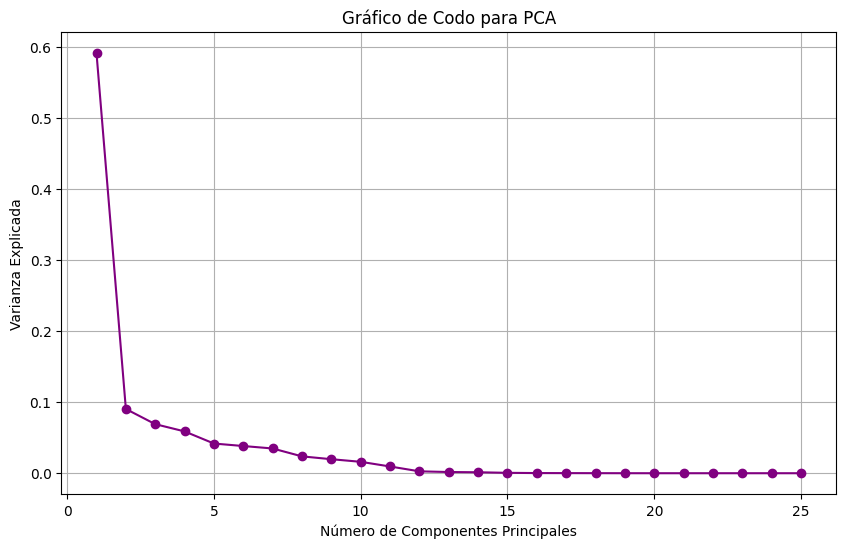

In [ ]:
# Obtener la varianza explicada por cada componente principal
varianza_explicada = pca.explained_variance_ratio_
# Crear el gráfico de codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(varianza_explicada) + 1), varianza_explicada, marker='o', linestyle='-', color='purple')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada')
plt.title('Gráfico de Codo para PCA')
plt.grid(True)
plt.show()

### **Interpretación del modelo**

In [ ]:
# Representación de las variables en los componentes principales
df_componentes_principales = df_componentes_principales.iloc[:, 0:4]
vvv = pca.components_[0:4,:]
# Obtener la representación de cada variable en cada componente principal y transponerla
representacion_variables = pd.DataFrame(vvv.T, columns=[f'PC{i+1}' for i in range(4)], index=variables_numericas.columns)
print(representacion_variables)


                                                       PC1       PC2  \
Altitud (m.s.n.m.)                                0.028176 -0.450955   
Área (km²)                                        0.022271  0.361317   
Poblacion_Total_2023                              0.258492  0.020822   
Hombres_2023                                      0.258386  0.023040   
Mujeres_2023                                      0.258494  0.018804   
Valor agregado PIB                                0.241381  0.134686   
Actividades terciarias ***                        0.255215  0.009785   
Actividades secundarias **                        0.138668  0.052061   
Actividades primarias *                           0.055588  0.315438   
# Promedio empresas 2021                          0.254140 -0.013807   
# promedio trabajadores 2021                      0.244121 -0.050107   
Promedio de trabajadores por empresa 2021         0.022911 -0.108162   
Población en edad laboral 2021                    0.258681  0.01

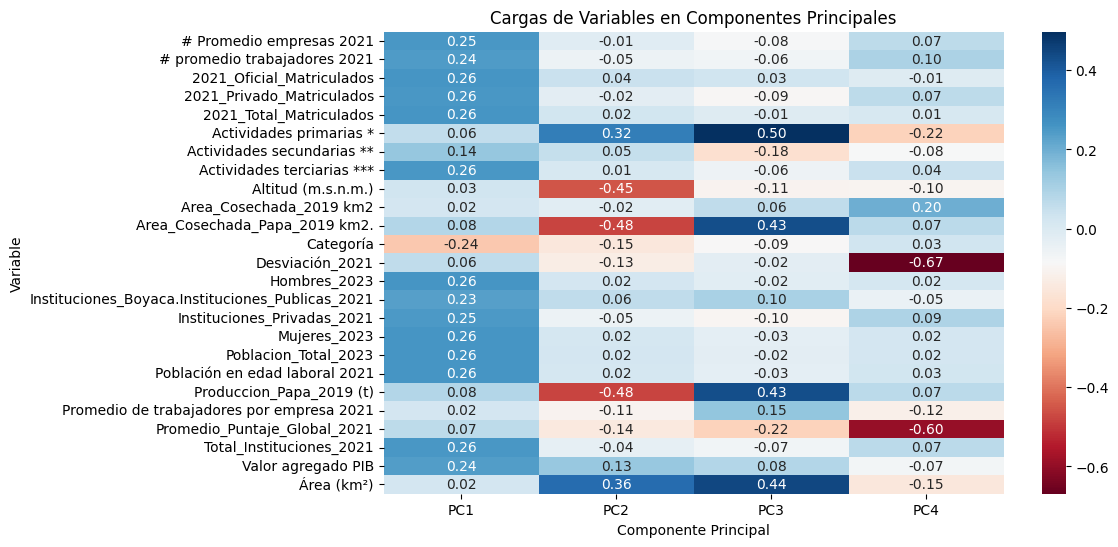

In [ ]:
# Preparar los datos para graficar
cargasheat = representacion_variables.unstack().reset_index()
cargasheat.columns = ['componente', 'variable', 'carga']

# Graficar
plt.figure(figsize=(10, 6))
sns.heatmap(cargasheat.pivot(index='variable', columns='componente', values='carga'), cmap='RdBu', annot=True, fmt=".2f")
plt.title('Cargas de Variables en Componentes Principales')
plt.xlabel('Componente Principal')
plt.ylabel('Variable')
plt.show()

Como se observa, la variabilidad de los variables es muy pequeña, por lo que se pasará al cuaderno 2, donde se ajustarán los parámetros para encontrar un modelo con más variabilidad.

## **ANÁLISIS FACTORIAL**

Con el fin de ganar más interpretabilidad utiizaremos análisis factorial, escogiendo el número de factores igual al número de componente escogidos, es decir,cuatro. Además, probaremos diferente métodos de generar factores y así mismo transformación de las variables por rotación.

In [ ]:
pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 887.6 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42564 sha256=535b454af77062df9fdb6af4823709791bc430d0998d418807b132ce85b539f2
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer


### **MODELO 1 AF**
Se hará con el método por dafault "minres" y sin rotación

In [ ]:
from factor_analyzer import FactorAnalyzer

# Crear un objeto FactorAnalyzer
fa = FactorAnalyzer(n_factors=4, rotation=None) # método por default
correlation_matrix = df_estandarizado.corr()

# Ajustar el modelo de análisis factorial a los componentes principales obtenidos
fa.fit(correlation_matrix)

results = fa.get_factor_variance()
# Obtener las cargas factoriales del objeto results
loadings = fa.loadings_

# Convertir las cargas factoriales a un DataFrame de Pandas para una mejor visualización
loadings_df = pd.DataFrame(loadings, index=df_estandarizado.columns, columns=['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4'])
loadings_df

Factor 1  Factor 2  \
Altitud (m.s.n.m.)                               -0.047727  0.790567   
Área (km²)                                        0.072593 -0.832677   
Poblacion_Total_2023                              0.998968 -0.009767   
Hombres_2023                                      0.999063 -0.012879   
Mujeres_2023                                      0.998861 -0.006955   
Valor agregado PIB                                0.985814 -0.138208   
Actividades terciarias ***                        0.997715  0.005948   
Actividades secundarias **                        0.844974 -0.032896   
Actividades primarias *                           0.339748 -0.626740   
# Promedio empresas 2021                          0.995047  0.031209   
# promedio trabajadores 2021                      0.988822  0.064346   
Promedio de trabajadores por empresa 2021        -0.107534  0.066188   
Población en edad laboral 2021                    0.998791 -0.005037   
Area_Cosechada_2019 km2                           0.005146 -0.045246   
Area_Cosechada_Papa_2019 km2.                     0.284621  0.694463   
Produccion_Papa_2019 (t)                          0.284621  0.694463   
Instituciones_Boyaca.Instituciones_Publicas_2021  0.990296 -0.076912   
Instituciones_Privadas_2021                       0.990584  0.070439   
Total_Instituciones_2021                          0.994741  0.049761   
2021_Oficial_Matriculados                         0.998621 -0.041290   
2021_Privado_Matriculados                         0.995131  0.041922   
2021_Total_Matriculados                           0.999230 -0.014945   
Promedio_Puntaje_Global_2021                      0.355933  0.252668   
Desviación_2021                                   0.245145  0.178716   
Categoría                                        -0.987849  0.142966   

                                                  Factor 3  Factor 4  
Altitud (m.s.n.m.)                               -0.107844 -0.035439  
Área (km²)                                        0.288087  0.403366  
Poblacion_Total_2023                              0.001069 -0.034122  
Hombres_2023                                      0.002110 -0.030557  
Mujeres_2023                                      0.000128 -0.037344  
Valor agregado PIB                                0.018506  0.029949  
Actividades terciarias ***                       -0.003406 -0.053361  
Actividades secundarias **                       -0.159088 -0.139509  
Actividades primarias *                           0.251165  0.427911  
# Promedio empresas 2021                         -0.005462 -0.068130  
# promedio trabajadores 2021                      0.017362 -0.069870  
Promedio de trabajadores por empresa 2021         0.070691  0.073754  
Población en edad laboral 2021                    0.000626 -0.037977  
Area_Cosechada_2019 km2                           0.170031 -0.256218  
Area_Cosechada_Papa_2019 km2.                     0.566508  0.333361  
Produccion_Papa_2019 (t)                          0.566508  0.333361  
Instituciones_Boyaca.Instituciones_Publicas_2021  0.042296  0.044426  
Instituciones_Privadas_2021                      -0.001228 -0.083056  
Total_Instituciones_2021                          0.004871 -0.064767  
2021_Oficial_Matriculados                         0.015745 -0.003866  
2021_Privado_Matriculados                        -0.012098 -0.077543  
2021_Total_Matriculados                           0.006933 -0.027262  
Promedio_Puntaje_Global_2021                     -0.702000  0.272196  
Desviación_2021                                  -0.662188  0.605566  
Categoría                                        -0.033246 -0.027431

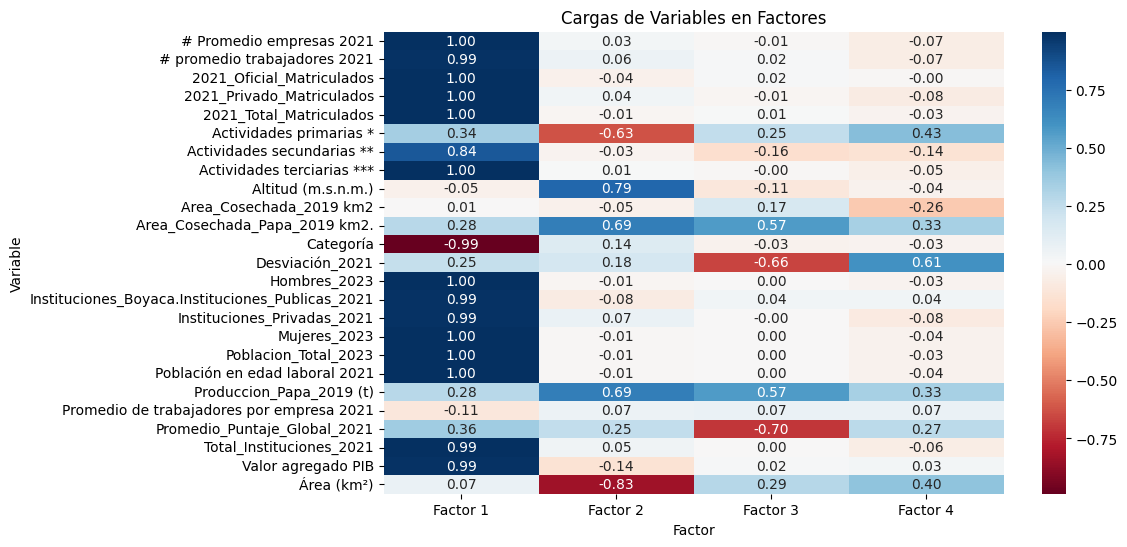

In [ ]:
# Preparar los datos para graficar
cargasheat = loadings_df.unstack().reset_index()
cargasheat.columns = ['factor', 'variable', 'carga']

# Graficar
plt.figure(figsize=(10, 6))
sns.heatmap(cargasheat.pivot(index='variable', columns='factor', values='carga'), cmap='RdBu', annot=True, fmt=".2f")
plt.title('Cargas de Variables en Factores')
plt.xlabel('Factor')
plt.ylabel('Variable')
plt.show()

In [ ]:
loadings_df["Comunalidad"] = fa.get_communalities()
loadings_df

Factor 1  Factor 2  \
Altitud (m.s.n.m.)                               -0.047727  0.790567   
Área (km²)                                        0.072593 -0.832677   
Poblacion_Total_2023                              0.998968 -0.009767   
Hombres_2023                                      0.999063 -0.012879   
Mujeres_2023                                      0.998861 -0.006955   
Valor agregado PIB                                0.985814 -0.138208   
Actividades terciarias ***                        0.997715  0.005948   
Actividades secundarias **                        0.844974 -0.032896   
Actividades primarias *                           0.339748 -0.626740   
# Promedio empresas 2021                          0.995047  0.031209   
# promedio trabajadores 2021                      0.988822  0.064346   
Promedio de trabajadores por empresa 2021        -0.107534  0.066188   
Población en edad laboral 2021                    0.998791 -0.005037   
Area_Cosechada_2019 km2                           0.005146 -0.045246   
Area_Cosechada_Papa_2019 km2.                     0.284621  0.694463   
Produccion_Papa_2019 (t)                          0.284621  0.694463   
Instituciones_Boyaca.Instituciones_Publicas_2021  0.990296 -0.076912   
Instituciones_Privadas_2021                       0.990584  0.070439   
Total_Instituciones_2021                          0.994741  0.049761   
2021_Oficial_Matriculados                         0.998621 -0.041290   
2021_Privado_Matriculados                         0.995131  0.041922   
2021_Total_Matriculados                           0.999230 -0.014945   
Promedio_Puntaje_Global_2021                      0.355933  0.252668   
Desviación_2021                                   0.245145  0.178716   
Categoría                                        -0.987849  0.142966   

                                                  Factor 3  Factor 4  \
Altitud (m.s.n.m.)                               -0.107844 -0.035439   
Área (km²)                                        0.288087  0.403366   
Poblacion_Total_2023                              0.001069 -0.034122   
Hombres_2023                                      0.002110 -0.030557   
Mujeres_2023                                      0.000128 -0.037344   
Valor agregado PIB                                0.018506  0.029949   
Actividades terciarias ***                       -0.003406 -0.053361   
Actividades secundarias **                       -0.159088 -0.139509   
Actividades primarias *                           0.251165  0.427911   
# Promedio empresas 2021                         -0.005462 -0.068130   
# promedio trabajadores 2021                      0.017362 -0.069870   
Promedio de trabajadores por empresa 2021         0.070691  0.073754   
Población en edad laboral 2021                    0.000626 -0.037977   
Area_Cosechada_2019 km2                           0.170031 -0.256218   
Area_Cosechada_Papa_2019 km2.                     0.566508  0.333361   
Produccion_Papa_2019 (t)                          0.566508  0.333361   
Instituciones_Boyaca.Instituciones_Publicas_2021  0.042296  0.044426   
Instituciones_Privadas_2021                      -0.001228 -0.083056   
Total_Instituciones_2021                          0.004871 -0.064767   
2021_Oficial_Matriculados                         0.015745 -0.003866   
2021_Privado_Matriculados                        -0.012098 -0.077543   
2021_Total_Matriculados                           0.006933 -0.027262   
Promedio_Puntaje_Global_2021                     -0.702000  0.272196   
Desviación_2021                                  -0.662188  0.605566   
Categoría                                        -0.033246 -0.027431   

                                                  Comunalidad  
Altitud (m.s.n.m.)                                   0.640161  
Área (km²)                                           0.944320  
Poblacion_Total_2023                                 0.999199  
Hombres_2023                                    

### **MODELO 2 AF**
Modelo con rotación "Varimax" y por el método "minres"

In [ ]:
# Crear un objeto FactorAnalyzer
fa2 = FactorAnalyzer(n_factors=4, rotation="varimax")
correlation_matrix = df_estandarizado.corr()

In [ ]:
# Ajustar el modelo de análisis factorial a los componentes principales obtenidos
fa2.fit(correlation_matrix)

results = fa2.get_factor_variance()
# Obtener las cargas factoriales del objeto results
loadings = fa2.loadings_

# Convertir las cargas factoriales a un DataFrame de Pandas para una mejor visualización
loadings_df = pd.DataFrame(loadings, index=df_estandarizado.columns, columns=['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4'])
loadings_df

Factor 1  Factor 2  \
Altitud (m.s.n.m.)                               -0.044469 -0.681487   
Área (km²)                                        0.015915  0.964423   
Poblacion_Total_2023                              0.993865  0.062559   
Hombres_2023                                      0.993461  0.067180   
Mujeres_2023                                      0.994207  0.058380   
Valor agregado PIB                                0.972218  0.201291   
Actividades terciarias ***                        0.995299  0.038803   
Actividades secundarias **                        0.857851 -0.038346   
Actividades primarias *                           0.276498  0.821089   
# Promedio empresas 2021                          0.994644  0.010511   
# promedio trabajadores 2021                      0.988362 -0.009150   
Promedio de trabajadores por empresa 2021        -0.117776  0.001593   
Población en edad laboral 2021                    0.994214  0.056712   
Area_Cosechada_2019 km2                           0.039498 -0.035723   
Area_Cosechada_Papa_2019 km2.                     0.226605 -0.164752   
Produccion_Papa_2019 (t)                          0.226605 -0.164752   
Instituciones_Boyaca.Instituciones_Publicas_2021  0.974139  0.168745   
Instituciones_Privadas_2021                       0.992114 -0.026855   
Total_Instituciones_2021                          0.993691  0.001094   
2021_Oficial_Matriculados                         0.989265  0.107726   
2021_Privado_Matriculados                         0.996068 -0.004963   
2021_Total_Matriculados                           0.993126  0.072137   
Promedio_Puntaje_Global_2021                      0.320184 -0.275387   
Desviación_2021                                   0.163689 -0.042547   
Categoría                                        -0.974459 -0.208945   

                                                  Factor 3  Factor 4  
Altitud (m.s.n.m.)                                0.378736  0.174118  
Área (km²)                                       -0.109895 -0.043330  
Poblacion_Total_2023                              0.055092  0.066956  
Hombres_2023                                      0.055629  0.068250  
Mujeres_2023                                      0.054605  0.065785  
Valor agregado PIB                                0.019788  0.077799  
Actividades terciarias ***                        0.052234  0.058946  
Actividades secundarias **                       -0.123854  0.084363  
Actividades primarias *                           0.020649  0.057952  
# Promedio empresas 2021                          0.058622  0.053856  
# promedio trabajadores 2021                      0.091644  0.041847  
Promedio de trabajadores por empresa 2021         0.111756  0.004268  
Población en edad laboral 2021                    0.055754  0.065306  
Area_Cosechada_2019 km2                          -0.039557 -0.303695  
Area_Cosechada_Papa_2019 km2.                     0.957436 -0.013142  
Produccion_Papa_2019 (t)                          0.957436 -0.013142  
Instituciones_Boyaca.Instituciones_Publicas_2021  0.078703  0.082155  
Instituciones_Privadas_2021                       0.077126  0.046469  
Total_Instituciones_2021                          0.077854  0.052156  
2021_Oficial_Matriculados                         0.060285  0.072987  
2021_Privado_Matriculados                         0.056209  0.053545  
2021_Total_Matriculados                           0.059095  0.066940  
Promedio_Puntaje_Global_2021                     -0.144429  0.747134  
Desviación_2021                                  -0.011733  0.931932  
Categoría                                        -0.025403 -0.065339

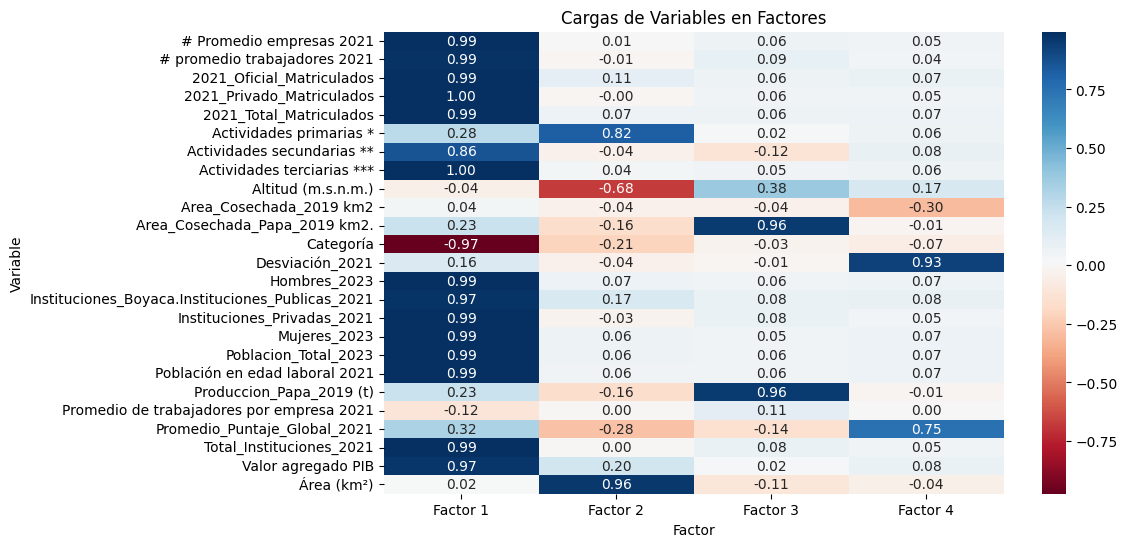

In [ ]:
# Preparar los datos para graficar
cargasheat_2 = loadings_df.unstack().reset_index()
cargasheat_2.columns = ['factor', 'variable', 'carga']

# Graficar
plt.figure(figsize=(10, 6))
sns.heatmap(cargasheat_2.pivot(index='variable', columns='factor', values='carga'), cmap='RdBu', annot=True, fmt=".2f")
plt.title('Cargas de Variables en Factores')
plt.xlabel('Factor')
plt.ylabel('Variable')
plt.show()

In [ ]:
loadings_df["Comunalidad"] = fa.get_communalities()
loadings_df

Factor 1  Factor 2  \
Altitud (m.s.n.m.)                               -0.044469 -0.681487   
Área (km²)                                        0.015915  0.964423   
Poblacion_Total_2023                              0.993865  0.062559   
Hombres_2023                                      0.993461  0.067180   
Mujeres_2023                                      0.994207  0.058380   
Valor agregado PIB                                0.972218  0.201291   
Actividades terciarias ***                        0.995299  0.038803   
Actividades secundarias **                        0.857851 -0.038346   
Actividades primarias *                           0.276498  0.821089   
# Promedio empresas 2021                          0.994644  0.010511   
# promedio trabajadores 2021                      0.988362 -0.009150   
Promedio de trabajadores por empresa 2021        -0.117776  0.001593   
Población en edad laboral 2021                    0.994214  0.056712   
Area_Cosechada_2019 km2                           0.039498 -0.035723   
Area_Cosechada_Papa_2019 km2.                     0.226605 -0.164752   
Produccion_Papa_2019 (t)                          0.226605 -0.164752   
Instituciones_Boyaca.Instituciones_Publicas_2021  0.974139  0.168745   
Instituciones_Privadas_2021                       0.992114 -0.026855   
Total_Instituciones_2021                          0.993691  0.001094   
2021_Oficial_Matriculados                         0.989265  0.107726   
2021_Privado_Matriculados                         0.996068 -0.004963   
2021_Total_Matriculados                           0.993126  0.072137   
Promedio_Puntaje_Global_2021                      0.320184 -0.275387   
Desviación_2021                                   0.163689 -0.042547   
Categoría                                        -0.974459 -0.208945   

                                                  Factor 3  Factor 4  \
Altitud (m.s.n.m.)                                0.378736  0.174118   
Área (km²)                                       -0.109895 -0.043330   
Poblacion_Total_2023                              0.055092  0.066956   
Hombres_2023                                      0.055629  0.068250   
Mujeres_2023                                      0.054605  0.065785   
Valor agregado PIB                                0.019788  0.077799   
Actividades terciarias ***                        0.052234  0.058946   
Actividades secundarias **                       -0.123854  0.084363   
Actividades primarias *                           0.020649  0.057952   
# Promedio empresas 2021                          0.058622  0.053856   
# promedio trabajadores 2021                      0.091644  0.041847   
Promedio de trabajadores por empresa 2021         0.111756  0.004268   
Población en edad laboral 2021                    0.055754  0.065306   
Area_Cosechada_2019 km2                          -0.039557 -0.303695   
Area_Cosechada_Papa_2019 km2.                     0.957436 -0.013142   
Produccion_Papa_2019 (t)                          0.957436 -0.013142   
Instituciones_Boyaca.Instituciones_Publicas_2021  0.078703  0.082155   
Instituciones_Privadas_2021                       0.077126  0.046469   
Total_Instituciones_2021                          0.077854  0.052156   
2021_Oficial_Matriculados                         0.060285  0.072987   
2021_Privado_Matriculados                         0.056209  0.053545   
2021_Total_Matriculados                           0.059095  0.066940   
Promedio_Puntaje_Global_2021                     -0.144429  0.747134   
Desviación_2021                                  -0.011733  0.931932   
Categoría                                        -0.025403 -0.065339   

                                                  Comunalidad  
Altitud (m.s.n.m.)                                   0.640161  
Área (km²)                                           0.944320  
Poblacion_Total_2023                                 0.999199  
Hombres_2023                                    

### **MODELO 3 AF**
Modelo sin rotación y con el método por componentes principales

In [ ]:
fa3 = FactorAnalyzer(n_factors=4, rotation=None, method = "principal")
correlation_matrix3 = df_estandarizado.corr()

In [ ]:
# Ajustar el modelo de análisis factorial a los componentes principales obtenidos
fa3.fit(correlation_matrix3)

results = fa3.get_factor_variance()
# Obtener las cargas factoriales del objeto results
loadings3 = fa3.loadings_

# Convertir las cargas factoriales a un DataFrame de Pandas para una mejor visualización
loadings_df3 = pd.DataFrame(loadings3, index=df_estandarizado.columns, columns=['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4'])
loadings_df3

Factor 1  Factor 2  \
Altitud (m.s.n.m.)                               -0.048956  0.880856   
Área (km²)                                        0.072940 -0.839337   
Poblacion_Total_2023                              0.998597 -0.007834   
Hombres_2023                                      0.998692 -0.010950   
Mujeres_2023                                      0.998487 -0.005018   
Valor agregado PIB                                0.985708 -0.134304   
Actividades terciarias ***                        0.997331  0.007815   
Actividades secundarias **                        0.857261 -0.022457   
Actividades primarias *                           0.344978 -0.679576   
# Promedio empresas 2021                          0.994646  0.032614   
# promedio trabajadores 2021                      0.988874  0.064257   
Promedio de trabajadores por empresa 2021        -0.114492  0.094108   
Población en edad laboral 2021                    0.998415 -0.003179   
Area_Cosechada_2019 km2                           0.005401 -0.079410   
Area_Cosechada_Papa_2019 km2.                     0.284164  0.648743   
Produccion_Papa_2019 (t)                          0.284164  0.648743   
Instituciones_Boyaca.Instituciones_Publicas_2021  0.990257 -0.075817   
Instituciones_Privadas_2021                       0.990279  0.070961   
Total_Instituciones_2021                          0.994332  0.050344   
2021_Oficial_Matriculados                         0.998265 -0.039374   
2021_Privado_Matriculados                         0.994734  0.043598   
2021_Total_Matriculados                           0.998860 -0.013101   
Promedio_Puntaje_Global_2021                      0.361487  0.296092   
Desviación_2021                                   0.246814  0.204986   
Categoría                                        -0.987543  0.139503   

                                                  Factor 3  Factor 4  
Altitud (m.s.n.m.)                               -0.067798  0.013843  
Área (km²)                                        0.184008  0.406314  
Poblacion_Total_2023                              0.007384 -0.026541  
Hombres_2023                                      0.007864 -0.023866  
Mujeres_2023                                      0.006950 -0.028958  
Valor agregado PIB                                0.008892  0.028748  
Actividades terciarias ***                        0.005777 -0.038360  
Actividades secundarias **                       -0.161177 -0.127483  
Actividades primarias *                           0.183405  0.414727  
# Promedio empresas 2021                          0.007198 -0.052108  
# promedio trabajadores 2021                      0.031436 -0.043327  
Promedio de trabajadores por empresa 2021         0.116749  0.427943  
Población en edad laboral 2021                    0.007633 -0.029328  
Area_Cosechada_2019 km2                           0.331350 -0.650141  
Area_Cosechada_Papa_2019 km2.                     0.559733  0.327438  
Produccion_Papa_2019 (t)                          0.559733  0.327438  
Instituciones_Boyaca.Instituciones_Publicas_2021  0.034949  0.034885  
Instituciones_Privadas_2021                       0.014759 -0.058249  
Total_Instituciones_2021                          0.017542 -0.044866  
2021_Oficial_Matriculados                         0.016534 -0.001685  
2021_Privado_Matriculados                         0.002012 -0.057178  
2021_Total_Matriculados                           0.011952 -0.019305  
Promedio_Puntaje_Global_2021                     -0.770182  0.084405  
Desviación_2021                                  -0.701655  0.432995  
Categoría                                        -0.023839 -0.025327

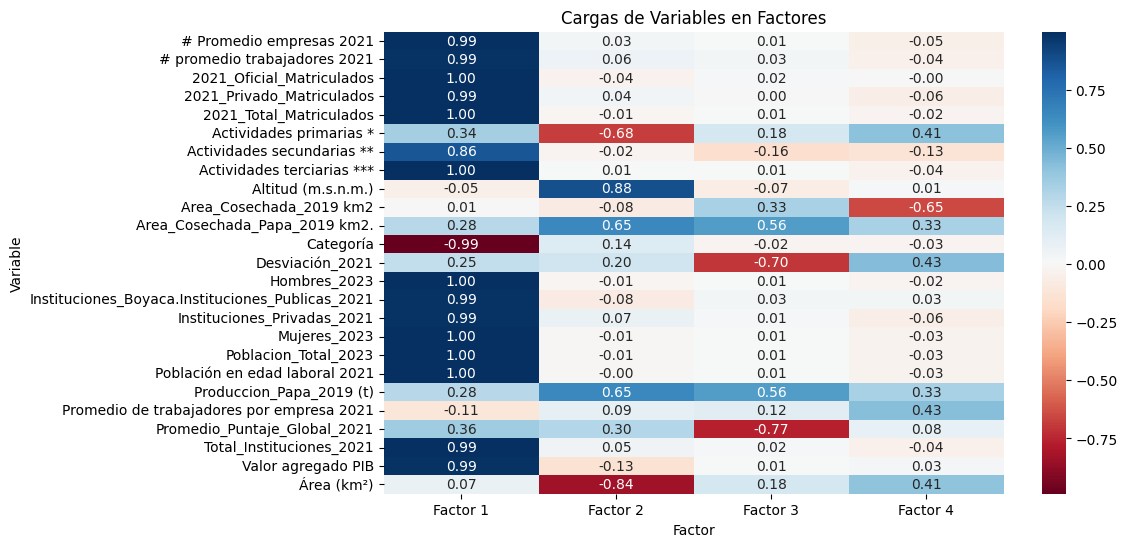

In [ ]:
# Preparar los datos para graficar
cargasheat_3 = loadings_df3.unstack().reset_index()
cargasheat_3.columns = ['factor', 'variable', 'carga']

# Graficar
plt.figure(figsize=(10, 6))
sns.heatmap(cargasheat_3.pivot(index='variable', columns='factor', values='carga'), cmap='RdBu', annot=True, fmt=".2f")
plt.title('Cargas de Variables en Factores')
plt.xlabel('Factor')
plt.ylabel('Variable')
plt.show()

Después de haber probado tres modelos con diferentes parámetros, nos dimos cuenta que el modelo 1, es el que tiene más variabilidad de los datos (Comunalidad/Variabilidad explicada total), es decir le gana en interpretabilidad a los demás modelos por una proporción muy pequeña. Sin embargo, con el fin de comparar con los resultados obtenidos en el cuaderno 2, escojeremos el modelo 2.
Como observación extra, vemos que el modelo 2 se comporta muy similar al modelo 3, en términos de interpretabilidad para cada variable

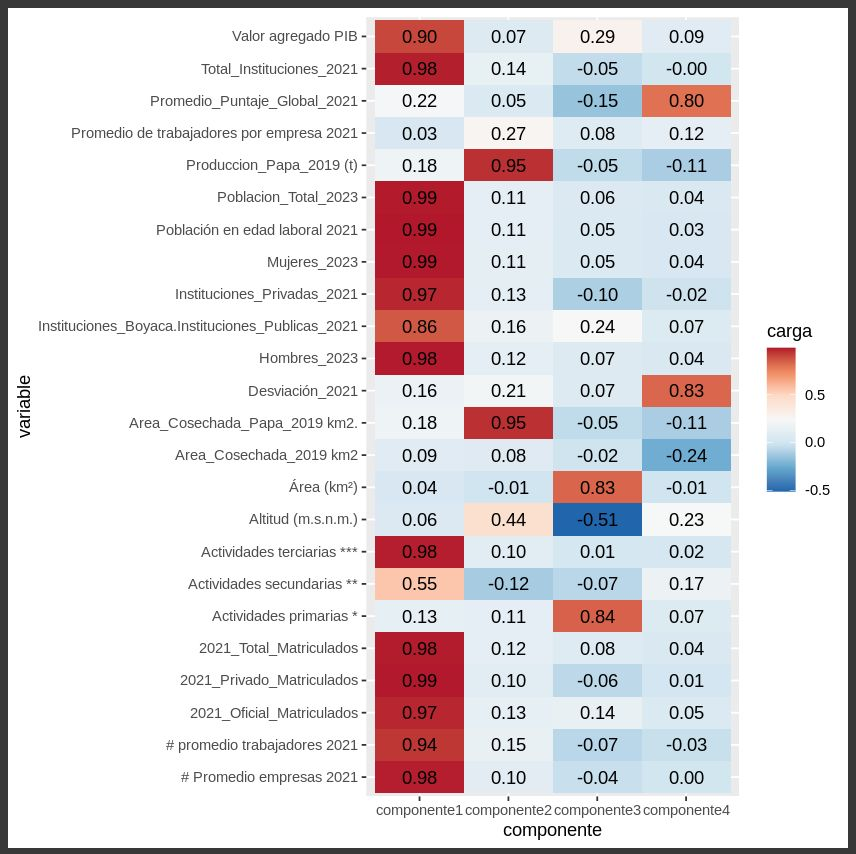


La visualización anterior presenta los resultados derivados de los componentes con rotación, utilizando la técnica de rotación "Varmax". En este análisis, nos proponemos comparar los eigenvectores con los pesos factoriales del modelo 3.

Aunque observamos que las mismas variables exhiben una relación o peso significativo para cada componente y factor (en diferente orden), es notable que los pesos factoriales tienden a ser más elevados en comparación con las relaciones de las variables en los componentes.

Por supuesto, aquí tienes la explicación revisada:

Los nombres asignados a cada factor y componente en el modelo se han basado en la correspondencia entre las variables más correlacionadas y la interpretación conceptual de cada uno. Así que, teniendo en cuenta esta correspondencia:

1. **Educación y empleo** (Factor1-PC1): Este componente, con mayor peso en variables como "Poblacion_Total_2023", "Hombres_2023", "Mujeres_2023", "# Promedio empresas 2021", y "# promedio trabajadores 2021", parece estar relacionado con aspectos socioeconómicos como la población y el empleo, que son indicadores clave del nivel de educación y desarrollo laboral en un municipio.

2. **Papa** (Factor2-PC2): El segundo componente tiene una alta correlación con variables relacionadas con la producción y el cultivo de papa, como "Area_Cosechada_Papa_2019 km²", "Produccion_Papa_2019 (t)", lo que sugiere que este componente está vinculado principalmente con la agricultura, específicamente con el cultivo de papa.

3.  **Desempeño de ICFES** (Factor3-PC4): El último componente parece estar relacionado con el desempeño en las pruebas del ICFES, ya que está más correlacionado con "Promedio_Puntaje_Global_2021" y "Desviación_2021". Esto sugiere que este factor representa la calidad educativa y el rendimiento académico de los estudiantes en los municipios.

4.  **Disponibilidad de tierras** (Factor4-PC3): Este componente está fuertemente asociado con variables que indican la disponibilidad de tierras para la actividades de explotación de recursos naturales, lo que sugiere que este factor representa la disponibilidad de tierras para estas actividades en los municipios.

Esta explicación proporciona una comprensión más clara de cómo se relacionan las variables con cada uno de los factores y componentes en el modelo, ayudando a interpretar mejor la naturaleza subyacente de los datos y sus relaciones dentro del contexto del análisis factorial.

# **VISUALIZACIÓN DE FACTORES**

A partir de este punto, utilizaremos la información obtenida a partir del análisis de componentes principales realizado, para representar de manera visual como se ven representados los municipios de Boyacá en dichos componentes.

In [ ]:
import geopandas as gpd

#leemos el archivo
shp_path = '/content/drive/MyDrive/MGN2021_MPIO_POLITICO (1)/MGN_MPIO_POLITICO.shp'
#Usamos encoding utf-8 para que reconozca los acentos y caracteres especiales del archivo shp como las letras "ñ"
sf = gpd.read_file(shp_path, encoding = 'utf-8')
#Hacemos un merge del GEO DataFrame y nuestra fuente de datos, para que esto funcione es importante que nuestras fuentes tengan una columna en común
sf = sf[sf['DPTO_CNMBR'] == "BOYACÁ"]
sf['MPIO_CNMBR'] = sf['MPIO_CNMBR'].apply(unidecode)
sf

DPTO_CCDGO MPIO_CCDGO MPIO_CDPMP DPTO_CNMBR           MPIO_CNMBR  \
195         15        001      15001     BOYACÁ                TUNJA   
196         15        022      15022     BOYACÁ              ALMEIDA   
197         15        047      15047     BOYACÁ            AQUITANIA   
198         15        051      15051     BOYACÁ             ARCABUCO   
199         15        087      15087     BOYACÁ                BELEN   
..         ...        ...        ...        ...                  ...   
313         15        837      15837     BOYACÁ                 TUTA   
314         15        839      15839     BOYACÁ               TUTAZA   
315         15        180      15180     BOYACÁ              CHISCAS   
316         15        223      15223     BOYACÁ               CUBARA   
317         15        332      15332     BOYACÁ  GUICAN DE LA SIERRA   

                             MPIO_CRSLC   MPIO_NAREA MPIO_CSMBL  MPIO_VGNC  \
195                                1541   119.688918          4       2021   
196                                1908    57.672119          4       2021   
197                                1789   942.146563          4       2021   
198                                1856   137.898588          4       2021   
199                                1756   163.088220          4       2021   
..                                  ...          ...        ...        ...   
313                                1725   165.545965          4       2021   
314                                1849   122.009502          4       2021   
315                                1761   658.814898          4       2021   
316  Ordenanza 8 de Diciembre 4 de 1965  1177.614610          4       2021   
317                                1799   952.217878          4       2021   

     MPIO_TIPO  Shape_Leng  Shape_Area  \
195  MUNICIPIO    0.572327    0.009766   
196  MUNICIPIO    0.348469    0.004702   
197  MUNICIPIO    1.800311    0.076844   
198  MUNICIPIO    0.752709    0.011257   
199  MUNICIPIO    0.629349    0.013315   
..         ...         ...         ...   
313  MUNICIPIO    0.699770    0.013510   
314  MUNICIPIO    0.503627    0.009962   
315  MUNICIPIO    1.264652    0.053835   
316  MUNICIPIO    1.871867    0.096242   
317  MUNICIPIO    1.537702    0.077778   

                                              geometry  
195  POLYGON ((-73.34014 5.58308, -73.34011 5.58308...  
196  POLYGON ((-73.36793 5.01349, -73.36672 5.01346...  
197  POLYGON ((-72.76242 5.63857, -72.76181 5.63837...  
198  POLYGON ((-73.50487 5.84348, -73.50451 5.84348...  
199  POLYGON ((-72.91692 6.08612, -72.91712 6.08590...  
..                                                 ...  
313  POLYGON ((-73.19168 5.72883, -73.19127 5.72869...  
314  POLYGON ((-72.82934 6.14308, -72.82931 6.14277...  
315  POLYGON ((-72.44104 6.84872, -72.44060 6.84862...  
316  POLYGON ((-72.17368 7.05308, -72.17277 7.05224...  
317  POLYGON ((-72.12940 6.74969, -72.12896 6.74853...  

[123 rows x 13 columns]

In [ ]:
# Tomar los scores de las pesos por observaciones
factor_scores = fa3.transform(df_estandarizado)
af_df = pd.DataFrame(factor_scores, index=df_estandarizado.index, columns=['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4'])
af_df

Factor 1  Factor 2   Factor 3   Factor 4
Nombre                                                 
ALMEIDA       -1.851290  0.009493  -4.928936  -0.162950
TUNJA         14.360949  8.112029   5.081291   4.443849
AQUITANIA     -0.874982 -3.262207   0.433152   3.344680
ARCABUCO      -1.480168  3.587651   3.506944   2.095587
BELEN         -1.540784  0.289732  -0.025468  -1.135650
...                 ...       ...        ...        ...
TUNUNGUA      -3.381317 -8.448727  26.549454 -12.883402
TUTAZA        -1.861519  2.532067   4.722688  -1.432503
VENTAQUEMADA  -0.372018  6.862990   9.045622   6.031111
VIRACACHA     -1.599561  5.481257   7.253055   1.157592
ZETAQUIRA     -1.648031 -1.692043  -4.076626   0.485574

[123 rows x 4 columns]

In [ ]:
df1 = pd.merge(af_df, sf[['Shape_Leng', 'Shape_Area','geometry']], left_index=True, right_on=sf["MPIO_CNMBR"], how='inner')
#df1.set_index("key_0", inplace=True)
df1

key_0   Factor 1  Factor 2   Factor 3   Factor 4  Shape_Leng  \
196       ALMEIDA  -1.851290  0.009493  -4.928936  -0.162950    0.348469   
195         TUNJA  14.360949  8.112029   5.081291   4.443849    0.572327   
197     AQUITANIA  -0.874982 -3.262207   0.433152   3.344680    1.800311   
198      ARCABUCO  -1.480168  3.587651   3.506944   2.095587    0.752709   
199         BELEN  -1.540784  0.289732  -0.025468  -1.135650    0.629349   
..            ...        ...       ...        ...        ...         ...   
311      TUNUNGUA  -3.381317 -8.448727  26.549454 -12.883402    0.251303   
314        TUTAZA  -1.861519  2.532067   4.722688  -1.432503    0.503627   
232  VENTAQUEMADA  -0.372018  6.862990   9.045622   6.031111    0.667858   
233     VIRACACHA  -1.599561  5.481257   7.253055   1.157592    0.341268   
234     ZETAQUIRA  -1.648031 -1.692043  -4.076626   0.485574    0.898104   

     Shape_Area                                           geometry  
196    0.004702  POLYGON ((-73.36793 5.01349, -73.36672 5.01346...  
195    0.009766  POLYGON ((-73.34014 5.58308, -73.34011 5.58308...  
197    0.076844  POLYGON ((-72.76242 5.63857, -72.76181 5.63837...  
198    0.011257  POLYGON ((-73.50487 5.84348, -73.50451 5.84348...  
199    0.013315  POLYGON ((-72.91692 6.08612, -72.91712 6.08590...  
..          ...                                                ...  
311    0.002386  POLYGON ((-73.92332 5.74185, -73.92337 5.74169...  
314    0.009962  POLYGON ((-72.82934 6.14308, -72.82931 6.14277...  
232    0.013054  POLYGON ((-73.44304 5.46228, -73.44286 5.46219...  
233    0.005106  POLYGON ((-73.27575 5.47445, -73.27503 5.47436...  
234    0.020512  POLYGON ((-73.05217 5.37369, -73.05196 5.37367...  

[123 rows x 8 columns]

In [ ]:
#Creamos una columna con el Cuantil al que pertenece nuestro registro
df1['quantile'] = pd.qcut(df1['Factor 1'], 5, labels=False)
df1 = gpd.GeoDataFrame(df1)
#Transformamos las coordenadas a epsg 3857 que es el que utilizan la mayoría de los mapas representados en la web
df1 = df1.to_crs(epsg=3857)
df1

key_0   Factor 1  Factor 2   Factor 3   Factor 4  Shape_Leng  \
196       ALMEIDA  -1.851290  0.009493  -4.928936  -0.162950    0.348469   
195         TUNJA  14.360949  8.112029   5.081291   4.443849    0.572327   
197     AQUITANIA  -0.874982 -3.262207   0.433152   3.344680    1.800311   
198      ARCABUCO  -1.480168  3.587651   3.506944   2.095587    0.752709   
199         BELEN  -1.540784  0.289732  -0.025468  -1.135650    0.629349   
..            ...        ...       ...        ...        ...         ...   
311      TUNUNGUA  -3.381317 -8.448727  26.549454 -12.883402    0.251303   
314        TUTAZA  -1.861519  2.532067   4.722688  -1.432503    0.503627   
232  VENTAQUEMADA  -0.372018  6.862990   9.045622   6.031111    0.667858   
233     VIRACACHA  -1.599561  5.481257   7.253055   1.157592    0.341268   
234     ZETAQUIRA  -1.648031 -1.692043  -4.076626   0.485574    0.898104   

     Shape_Area                                           geometry  quantile  
196    0.004702  POLYGON ((-8167280.063 558812.753, -8167145.64...         1  
195    0.009766  POLYGON ((-8164186.535 622492.070, -8164183.55...         4  
197    0.076844  POLYGON ((-8099875.320 628697.842, -8099807.38...         4  
198    0.011257  POLYGON ((-8182524.348 651623.643, -8182484.56...         3  
199    0.013315  POLYGON ((-8117074.891 678781.642, -8117096.90...         3  
..          ...                                                ...       ...  
311    0.002386  POLYGON ((-8229105.993 640252.814, -8229111.38...         0  
314    0.009962  POLYGON ((-8107325.468 685158.072, -8107321.39...         1  
232    0.013054  POLYGON ((-8175641.698 608981.414, -8175621.78...         4  
233    0.005106  POLYGON ((-8157018.628 610341.986, -8156938.60...         3  
234    0.020512  POLYGON ((-8132129.875 599074.883, -8132106.55...         3  

[123 rows x 9 columns]

In [ ]:
df1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 123 entries, 196 to 234
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   key_0       123 non-null    object  
 1   Factor 1    123 non-null    float64 
 2   Factor 2    123 non-null    float64 
 3   Factor 3    123 non-null    float64 
 4   Factor 4    123 non-null    float64 
 5   Shape_Leng  123 non-null    float64 
 6   Shape_Area  123 non-null    float64 
 7   geometry    123 non-null    geometry
 8   quantile    123 non-null    int64   
dtypes: float64(6), geometry(1), int64(1), object(1)
memory usage: 9.6+ KB


## **Factor** 1 - MAPA

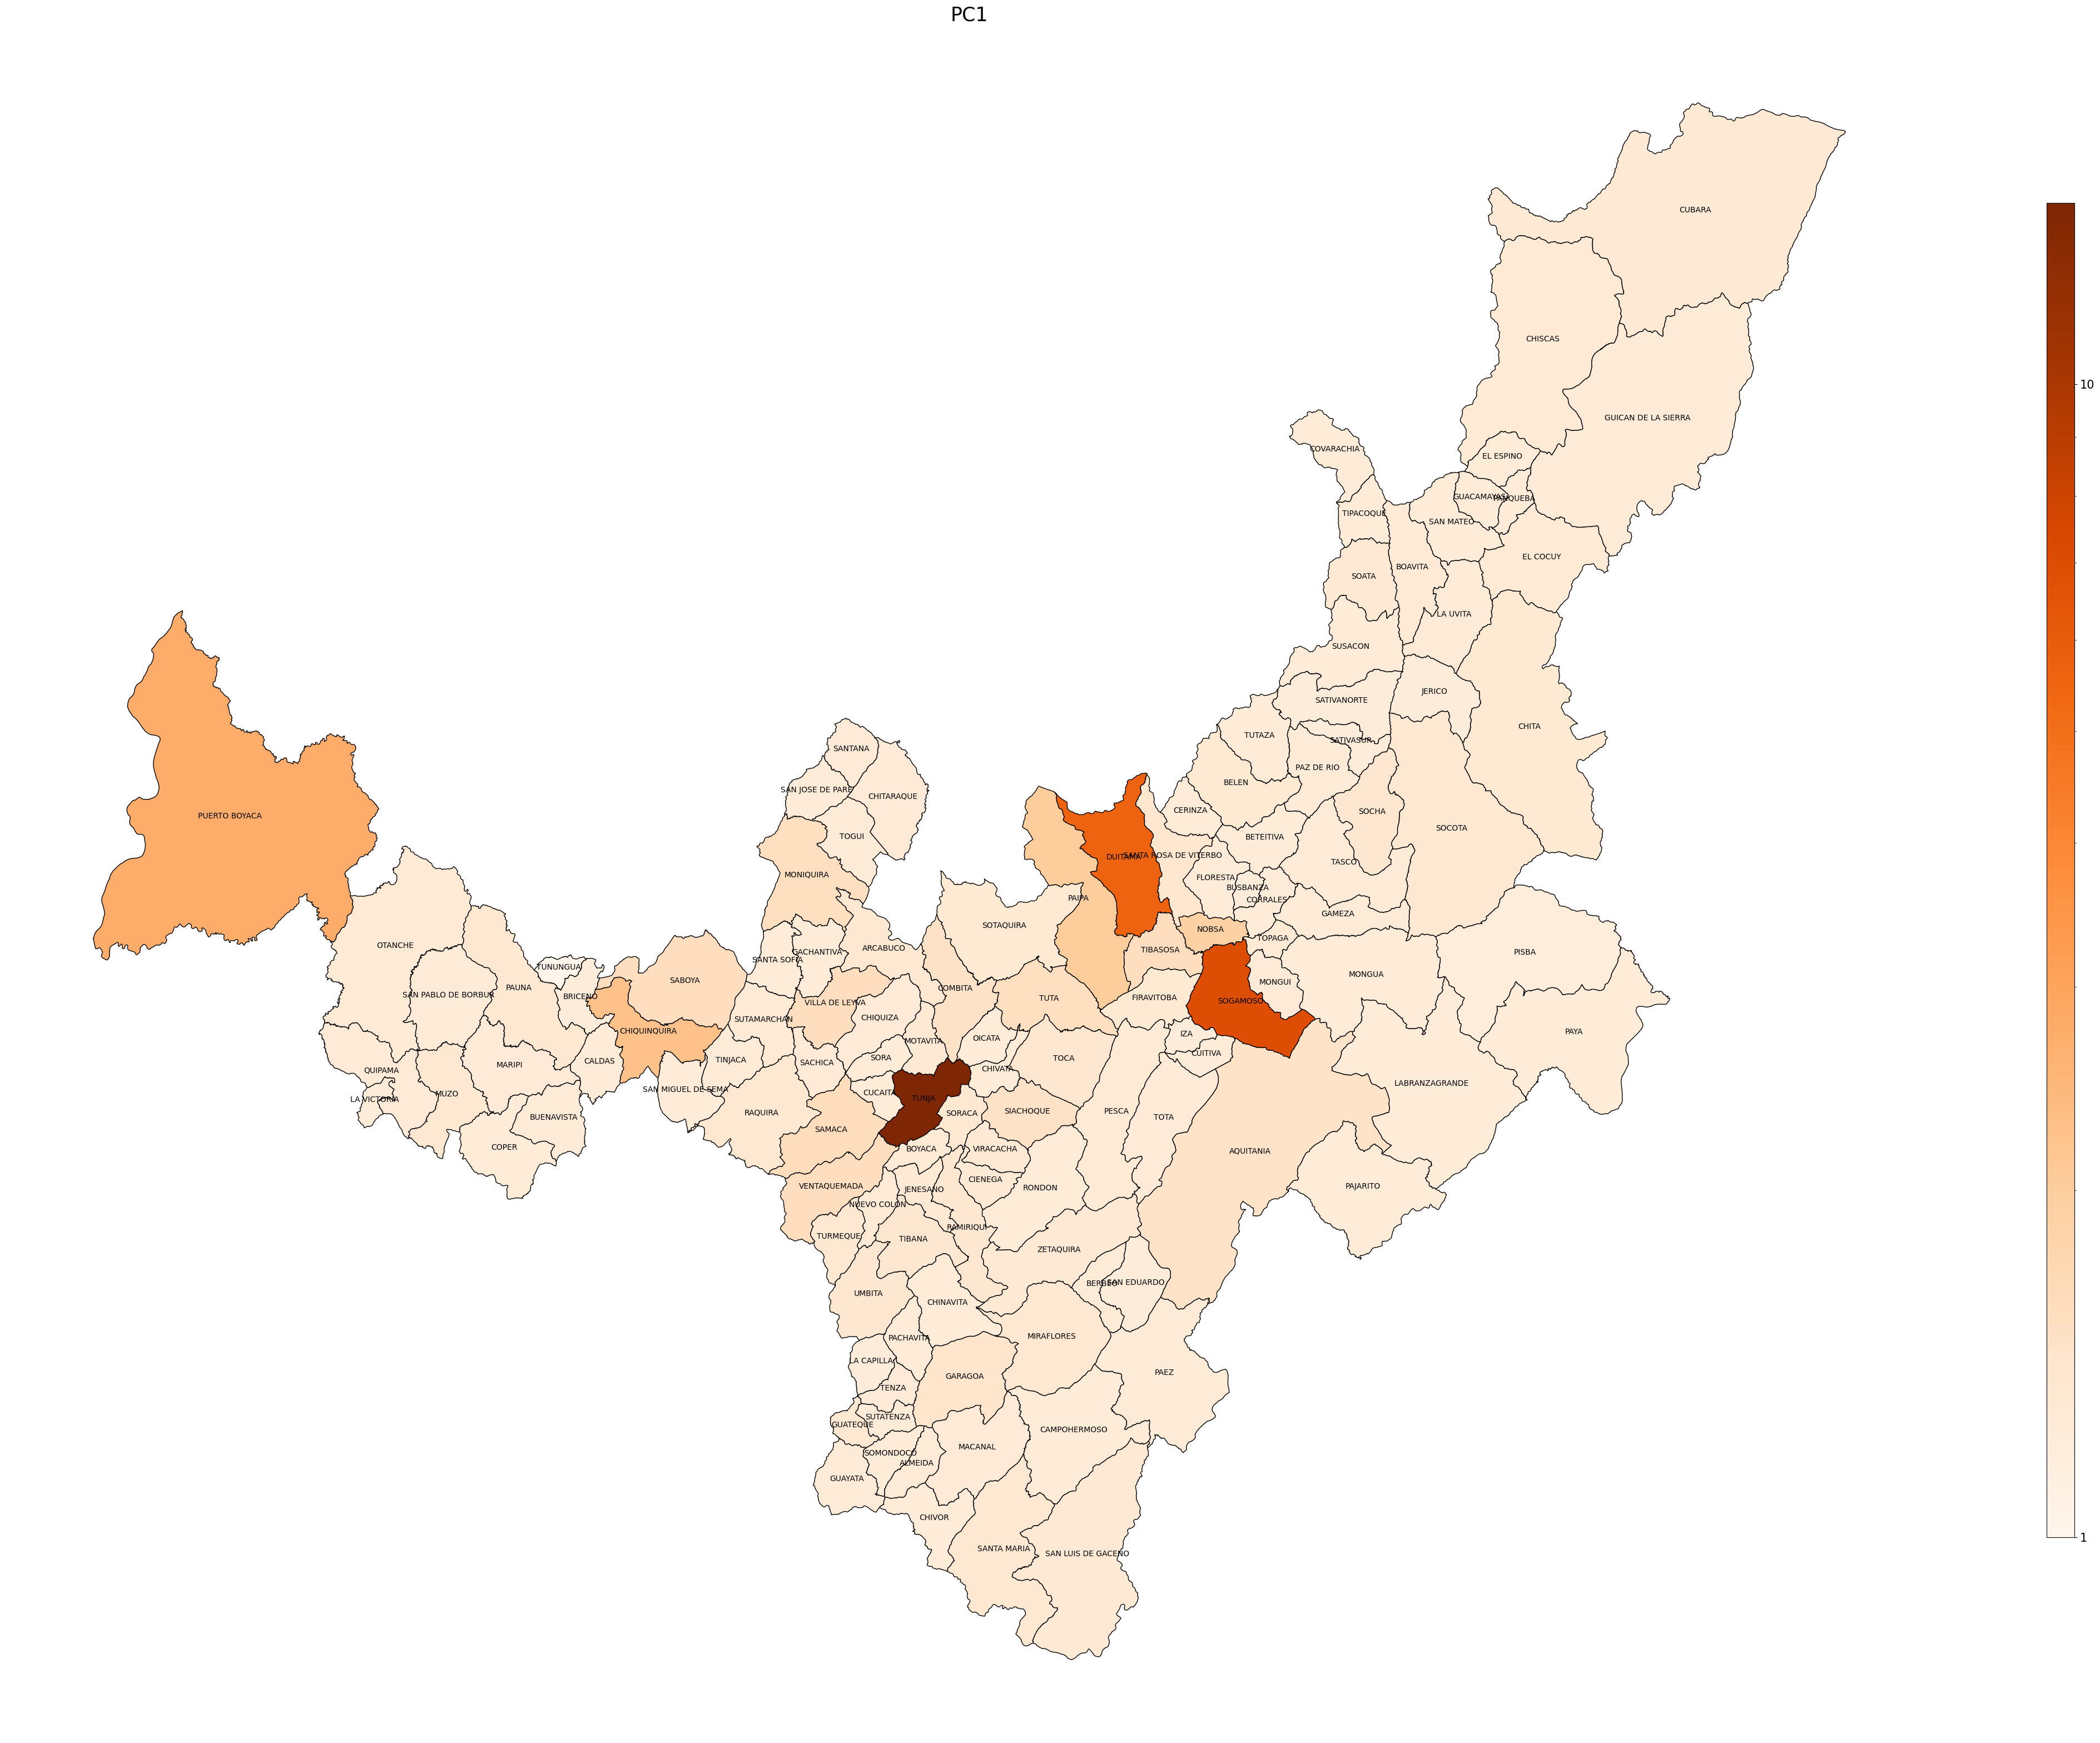

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mplc
import matplotlib.ticker as ticker

# Creando una figura en matplotlib y ajustando el tamaño deseado
fig, ax = plt.subplots(1, figsize=(50, 40))

# Plotear el mapa utilizando los datos de df1 y la columna FACTOR 1
df1.plot(
    column='Factor 1',
    legend=False,
    cmap='Oranges',
    ax=ax,
    linewidth=1,  # Ajustando el grosor de las líneas del mapa
    edgecolor='black'  # Color de las líneas del mapa
)

# Obtener los valores mínimos y máximos reales de la columna FACTOR 1
vmin = df1['Factor 1'].min()
vmax = df1['Factor 1'].max()

# Verificar si los valores mínimos y máximos son válidos
if vmin <= 0:
    vmin = 1  # Si el mínimo es menor o igual a cero, se establece a 1

# Agregando etiquetas de municipios
for idx, row in df1.iterrows():
    ax.annotate(text=row['key_0'], xy=(row.geometry.centroid.x, row.geometry.centroid.y), color='black', fontsize=10, ha='center')

# Agregando barra de color a través de matplotlib

# Ajustando posición y dimensiones de la barra
cax = fig.add_axes([0.9, 0.2, 0.01, 0.6])
# Atributos de la barra de color
sm = plt.cm.ScalarMappable(
    cmap='Oranges',
    norm=mplc.LogNorm(vmin=vmin, vmax=vmax)
)
sm._A = []

# OPCIONAL
# Formateando los números a absolutos de lo contrario salieran a base 10
formatter = ticker.LogFormatter(10, labelOnlyBase=False)
cbr = fig.colorbar(
    sm,
    cax=cax,
    format=formatter,
    ticks=[1, 10, 100]
)

ax.set_title('PC1', fontsize=25)

cbr.ax.tick_params(labelsize=15)  # Tamaño de letra de las legendas

ax.axis('off')  # Desactivando los ejes de posicionamiento

plt.show()

Se nota que en este factor, vinculado al desarrollo socioeconómico, municipios como Tunja, Duitama, Sogamoso y Puerto Boyacá (en ese orden) exhiben un mayor nivel de desarrollo. Sin embargo, este comportamiento también tiende a incluir valores atípicos que pueden distorsionar la percepción general. Mientras estos municipios líderes destacan por su progreso, su influencia puede afectar a otros municipios que, a pesar de tener un nivel de desarrollo similar entre ellos, muestran una tendencia más baja en comparación.

## **Factor 2 - MAPA**

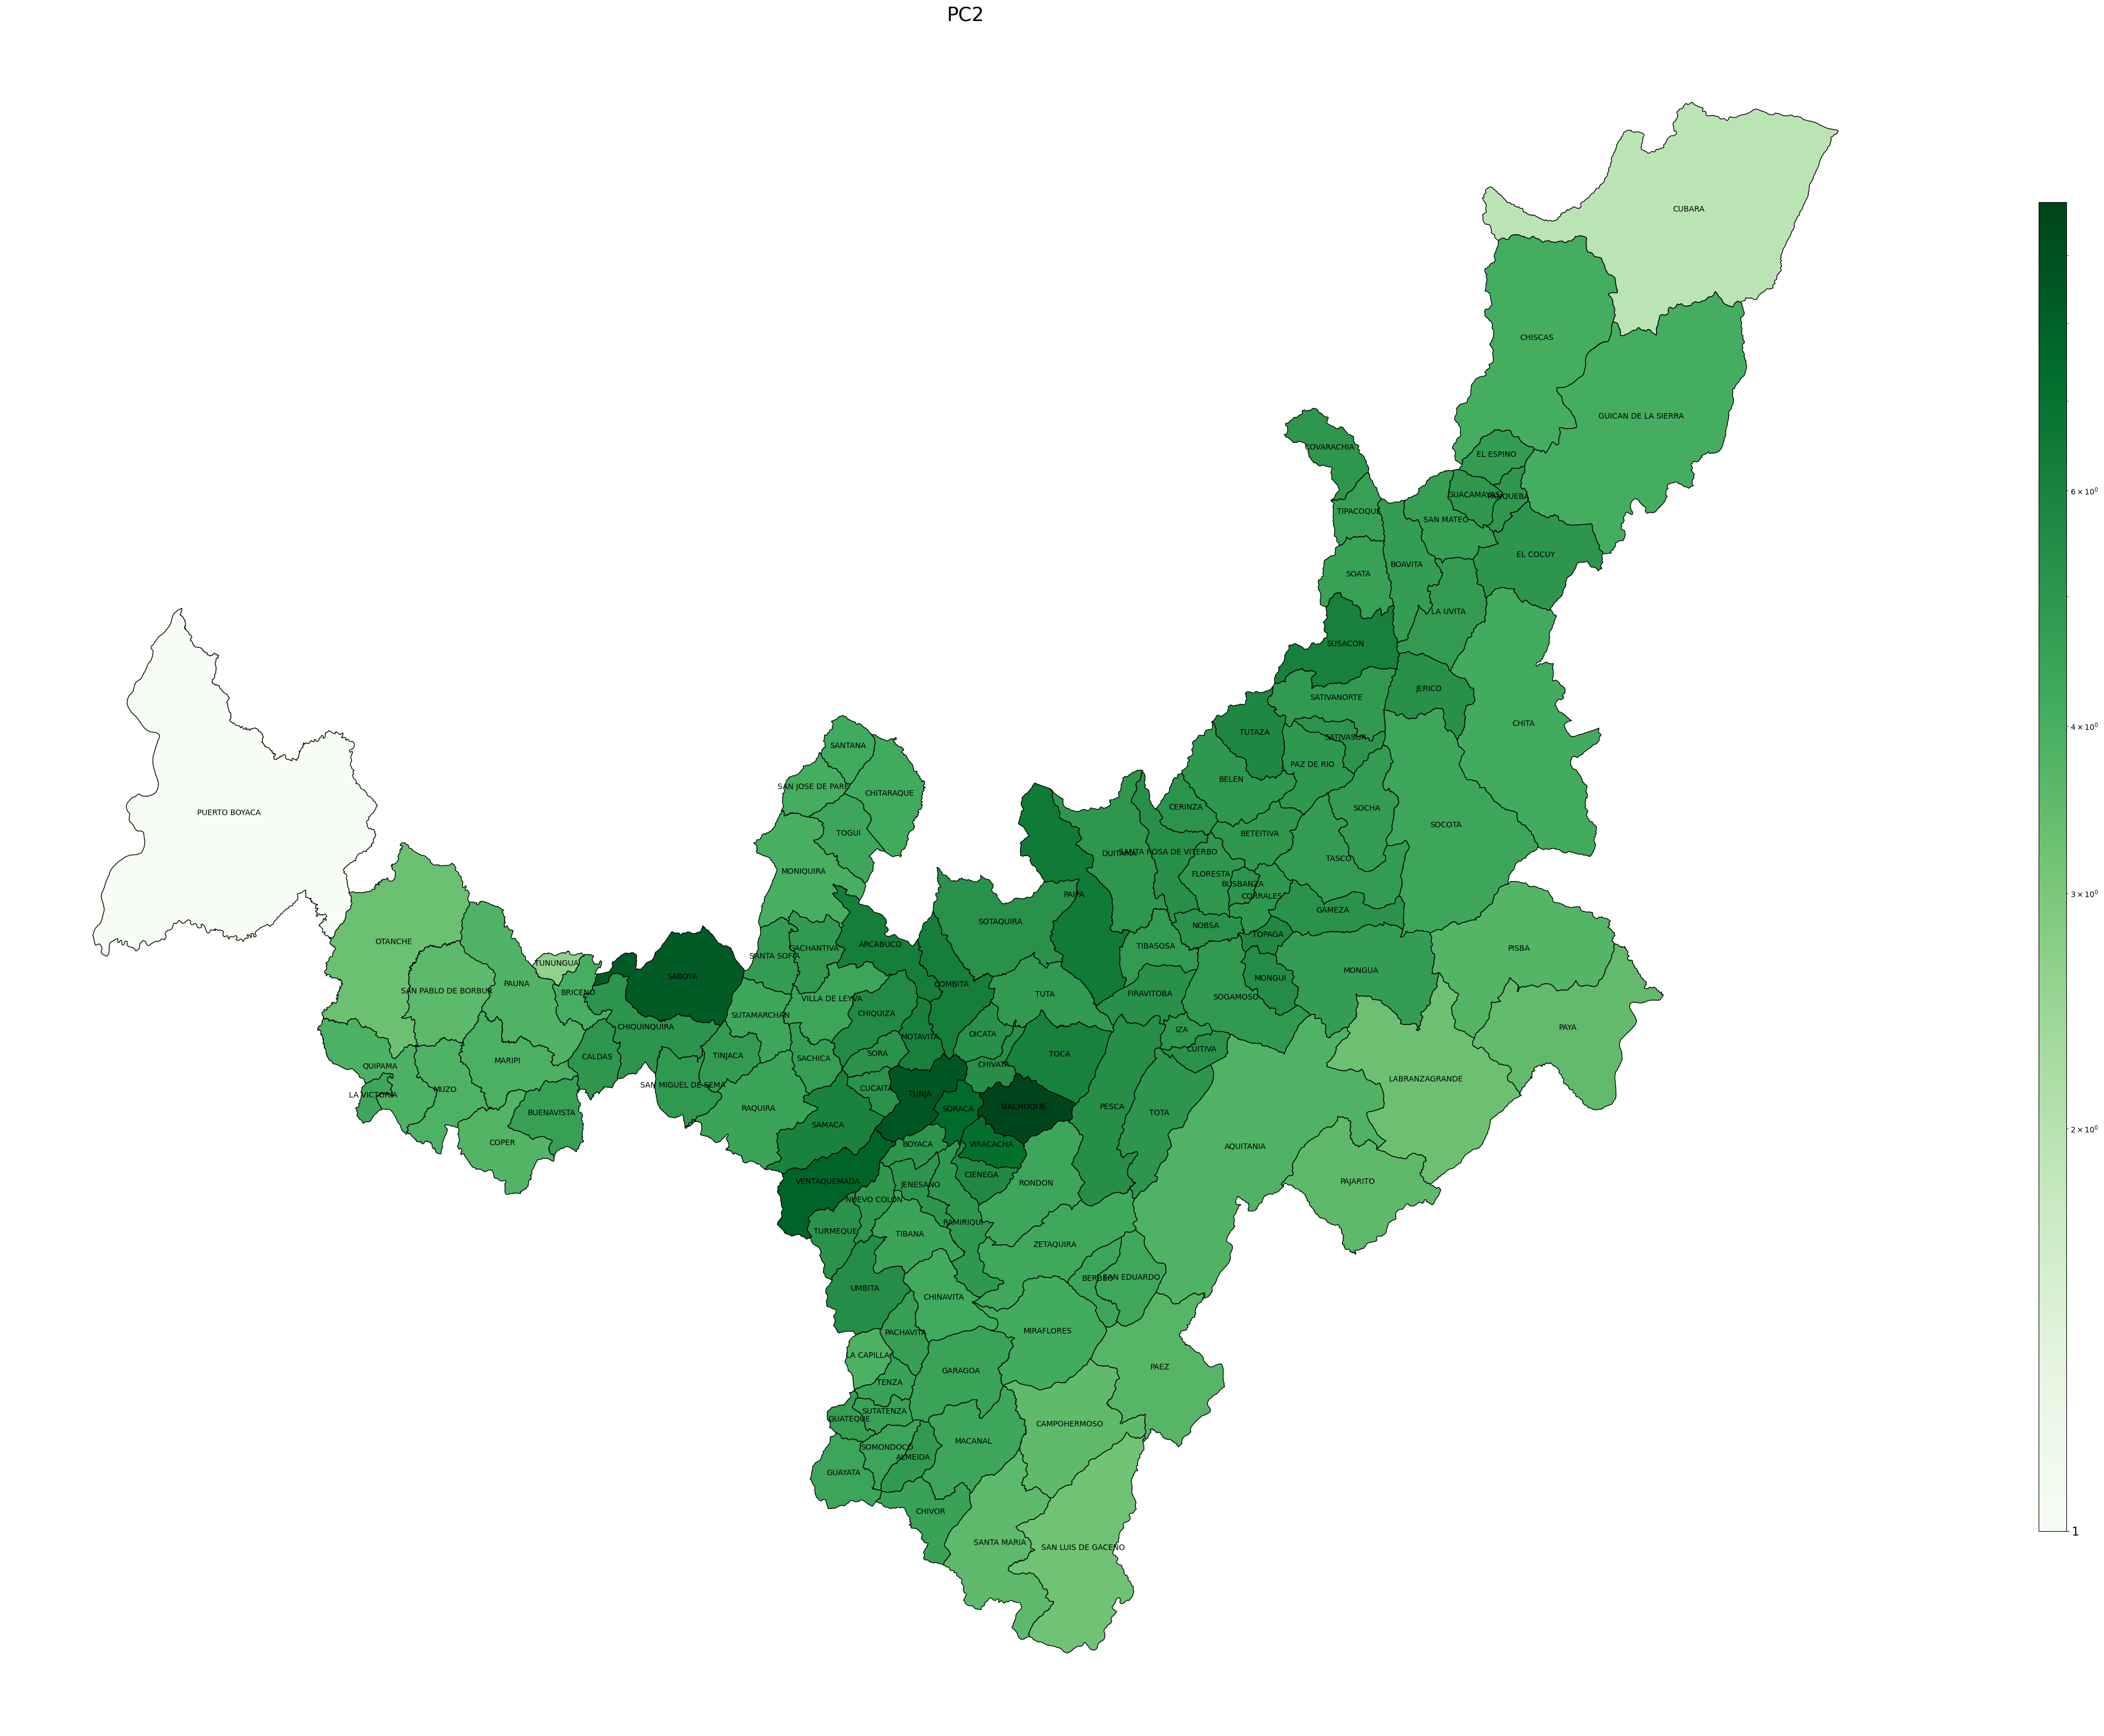

In [ ]:
# Creando una figura en matplotlib y ajustando el tamaño deseado
fig, ax = plt.subplots(1, figsize=(50, 40))

# Plotear el mapa utilizando los datos de df1 y la columna FACTOR 2
df1.plot(
    column='Factor 2',
    legend=False,
    cmap='Greens',
    ax=ax,
    linewidth=1,  # Ajustando el grosor de las líneas del mapa
    edgecolor='black'  # Color de las líneas del mapa
)

# Obtener los valores mínimos y máximos reales de la columna FACTOR 2
vmin = df1['Factor 2'].min()
vmax = df1['Factor 2'].max()

# Verificar si los valores mínimos y máximos son válidos
if vmin <= 0:
    vmin = 1  # Si el mínimo es menor o igual a cero, se establece a 1

# Agregando etiquetas de municipios
for idx, row in df1.iterrows():
    ax.annotate(text=row['key_0'], xy=(row.geometry.centroid.x, row.geometry.centroid.y), color='black', fontsize=10, ha='center')

# Agregando barra de color a través de matplotlib

# Ajustando posición y dimensiones de la barra
cax = fig.add_axes([0.9, 0.2, 0.01, 0.6])
# Atributos de la barra de color
sm = plt.cm.ScalarMappable(
    cmap='Greens',
    norm=mplc.LogNorm(vmin=vmin, vmax=vmax)
)
sm._A = []

# OPCIONAL
# Formateando los números a absolutos de lo contrario salieran a base 10
formatter = ticker.LogFormatter(10, labelOnlyBase=False)
cbr = fig.colorbar(
    sm,
    cax=cax,
    format=formatter,
    ticks=[1, 10, 100]
)

ax.set_title('PC2', fontsize=25)

cbr.ax.tick_params(labelsize=15)  # Tamaño de letra de las legendas

ax.axis('off')  # Desactivando los ejes de posicionamiento

plt.show()

El factor asociado con la producción de papa refleja la influencia de la cordillera en la región central, donde las condiciones climáticas, determinadas por la altitud, favorecen este cultivo. Esto es evidente en municipios como Saboyá, Siachoque, Tunja y Ventaquemada, donde las características geográficas y climáticas crean un entorno propicio para el cultivo exitoso de la papa en comparación con otros municipios.



## **Factor 3 - MAPA**

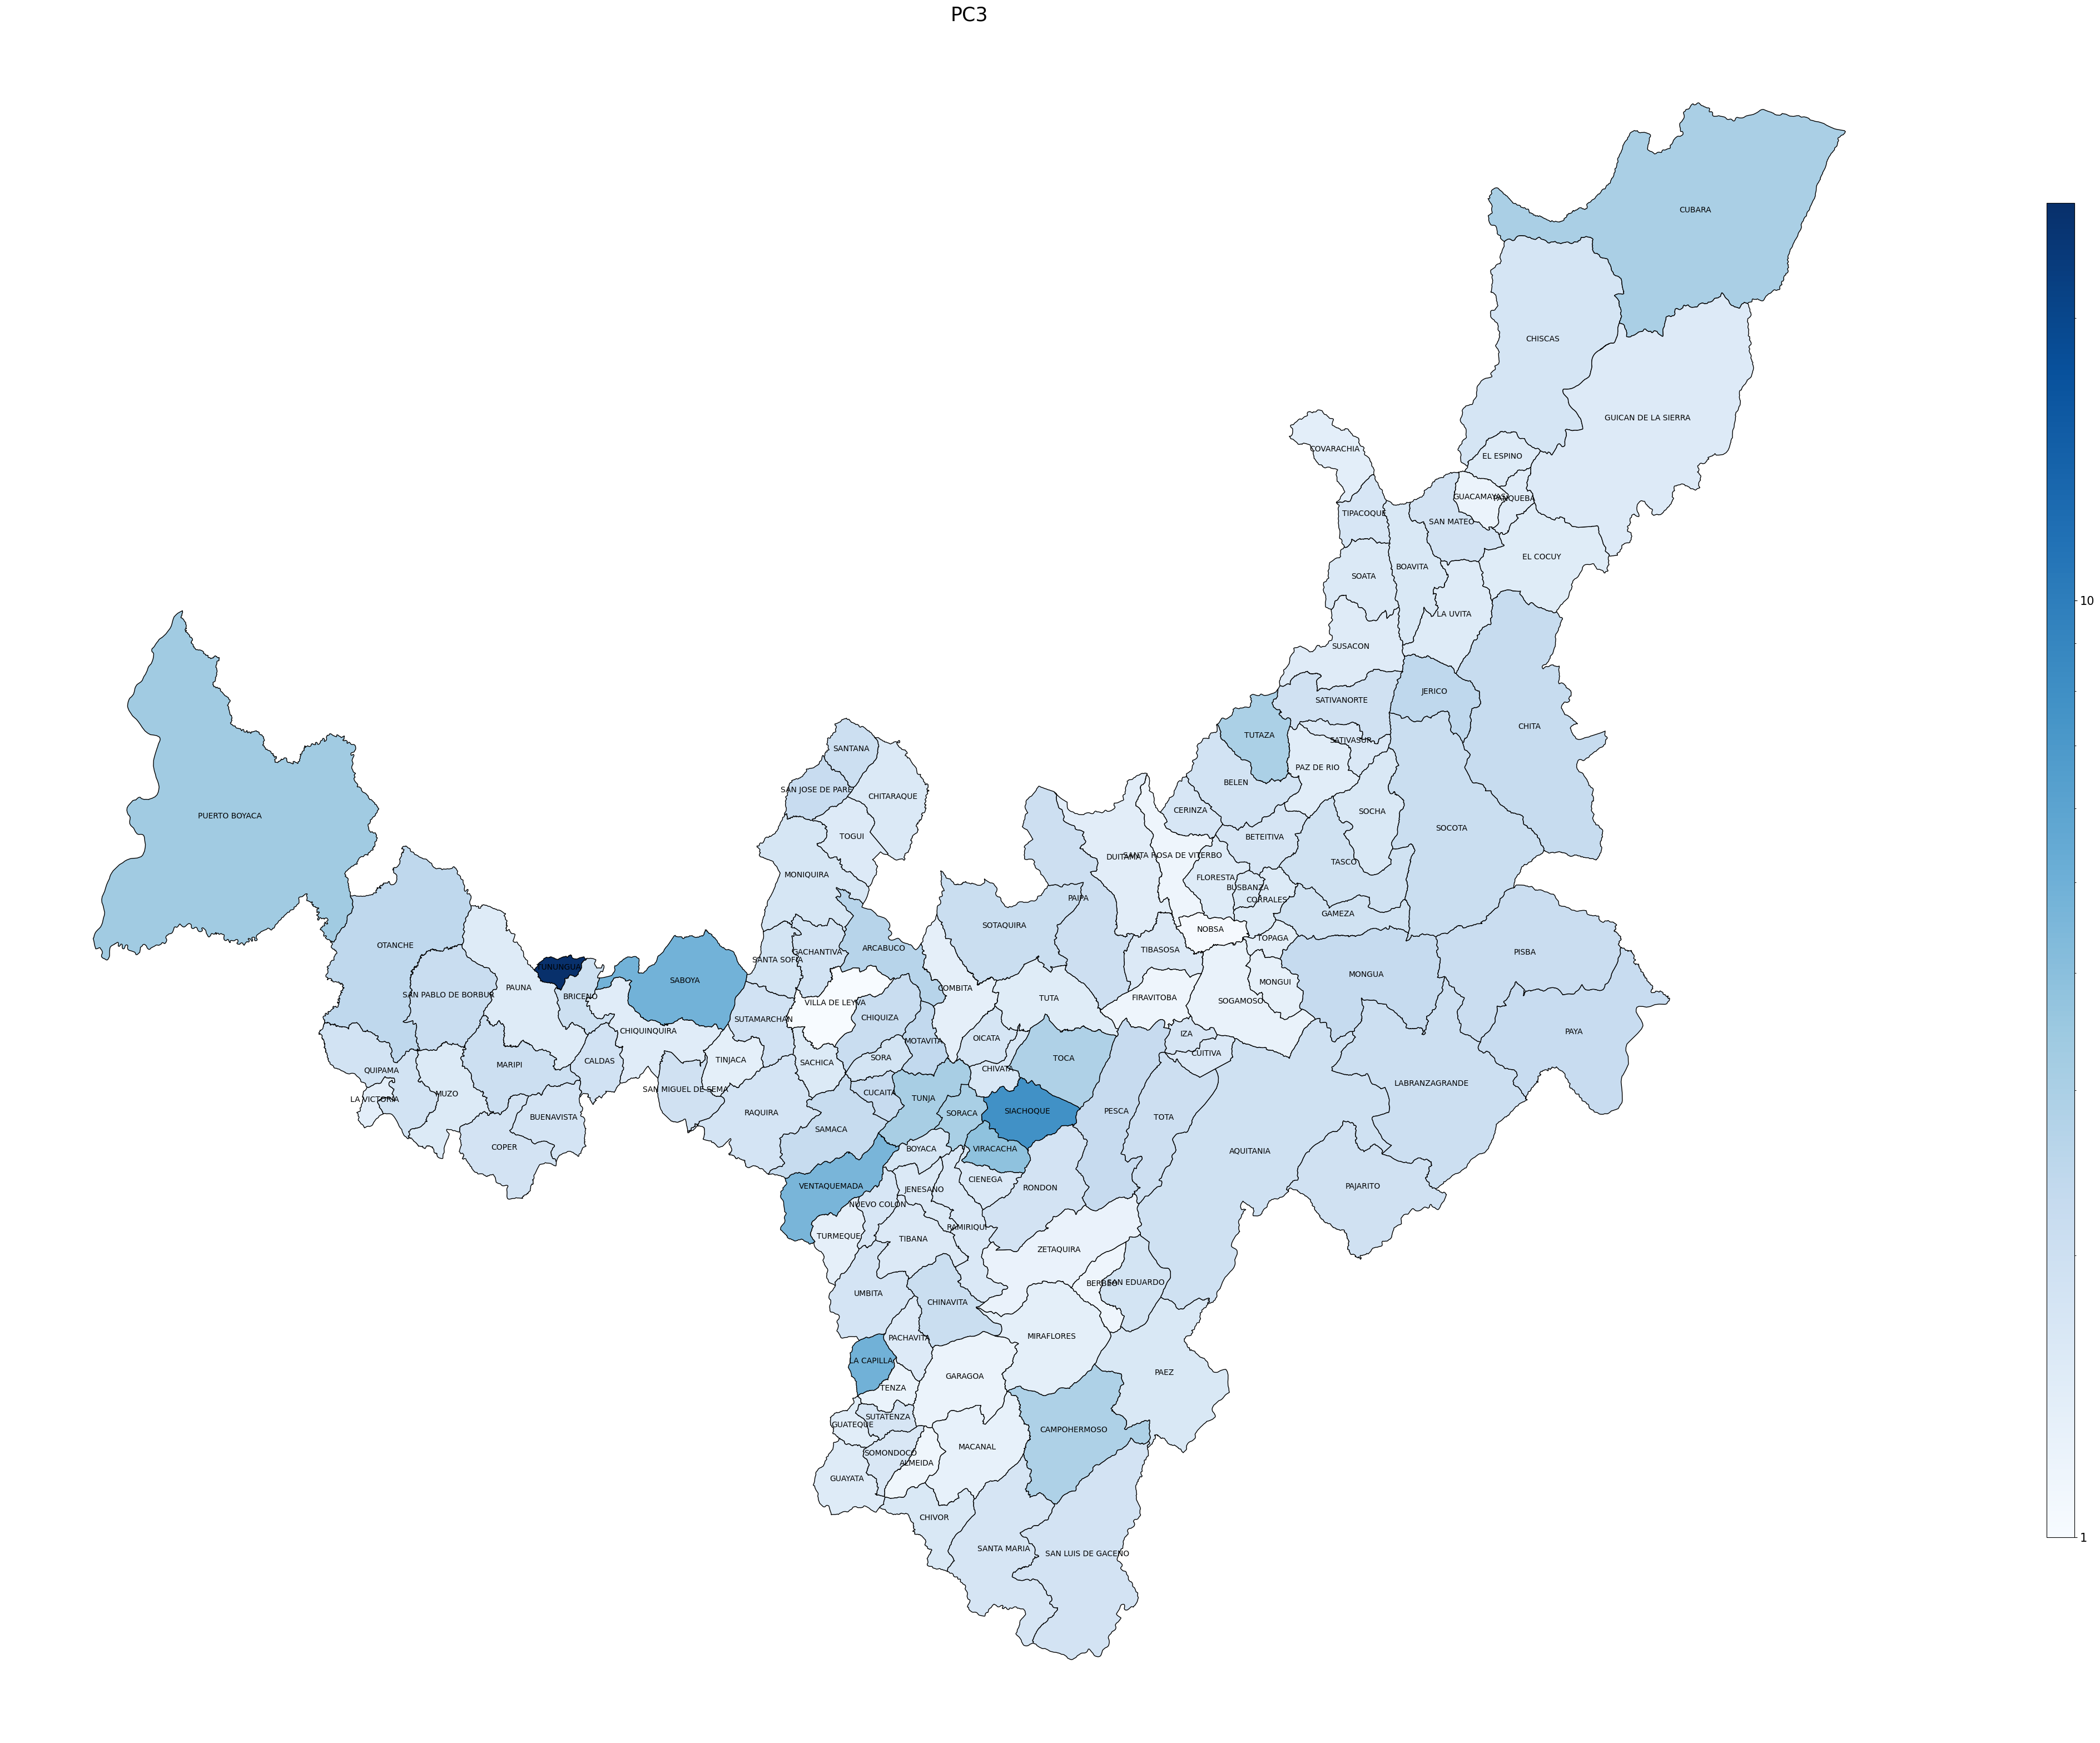

In [ ]:
# Creando una figura en matplotlib y ajustando el tamaño deseado
fig, ax = plt.subplots(1, figsize=(50, 40))

# Plotear el mapa utilizando los datos de df1 y la columna FACTOR 3
df1.plot(
    column='Factor 3',
    legend=False,
    cmap='Blues',
    ax=ax,
    linewidth=1,  # Ajustando el grosor de las líneas del mapa
    edgecolor='black'  # Color de las líneas del mapa
)

# Obtener los valores mínimos y máximos reales de la columna FACTOR 3
vmin = df1['Factor 3'].min()
vmax = df1['Factor 3'].max()

# Verificar si los valores mínimos y máximos son válidos
if vmin <= 0:
    vmin = 1  # Si el mínimo es menor o igual a cero, se establece a 1

# Agregando etiquetas de municipios
for idx, row in df1.iterrows():
    ax.annotate(text=row['key_0'], xy=(row.geometry.centroid.x, row.geometry.centroid.y), color='black', fontsize=10, ha='center')

# Agregando barra de color a través de matplotlib

# Ajustando posición y dimensiones de la barra
cax = fig.add_axes([0.9, 0.2, 0.01, 0.6])
# Atributos de la barra de color
sm = plt.cm.ScalarMappable(
    cmap='Blues',
    norm=mplc.LogNorm(vmin=vmin, vmax=vmax)
)
sm._A = []

# OPCIONAL
# Formateando los números a absolutos de lo contrario salieran a base 10
formatter = ticker.LogFormatter(10, labelOnlyBase=False)
cbr = fig.colorbar(
    sm,
    cax=cax,
    format=formatter,
    ticks=[1, 10, 100]
)

ax.set_title('PC3', fontsize=25)

cbr.ax.tick_params(labelsize=15)  # Tamaño de letra de las legendas

ax.axis('off')  # Desactivando los ejes de posicionamiento

plt.show()

Los pesos factoriales negativos para estas variables sugieren que un mayor puntaje promedio global y una mayor variabilidad en los puntajes están relacionados con una contribución o peso más bajo en el factor o componente específico en el análisis factorial. Por ejemplo, Villa de Leyva parece tener uno de los promedios y desviaciones en el puntaje de ICFES más altos, lo que podría indicar un alto nivel educativo. Por otro lado, Tunungua no tiene registros en estas variables, lo que podría resultar en un puntaje más alto en el factor.

Esto sugiere que, aunque Villa de Leyva tiene un alto desempeño académico, su influencia en el factor podría ser menor debido a su baja variabilidad en los puntajes, mientras que Tunungua podría destacar en el factor debido a la falta de registros en las variables asociadas.

## **Factor 4 - MAPA**

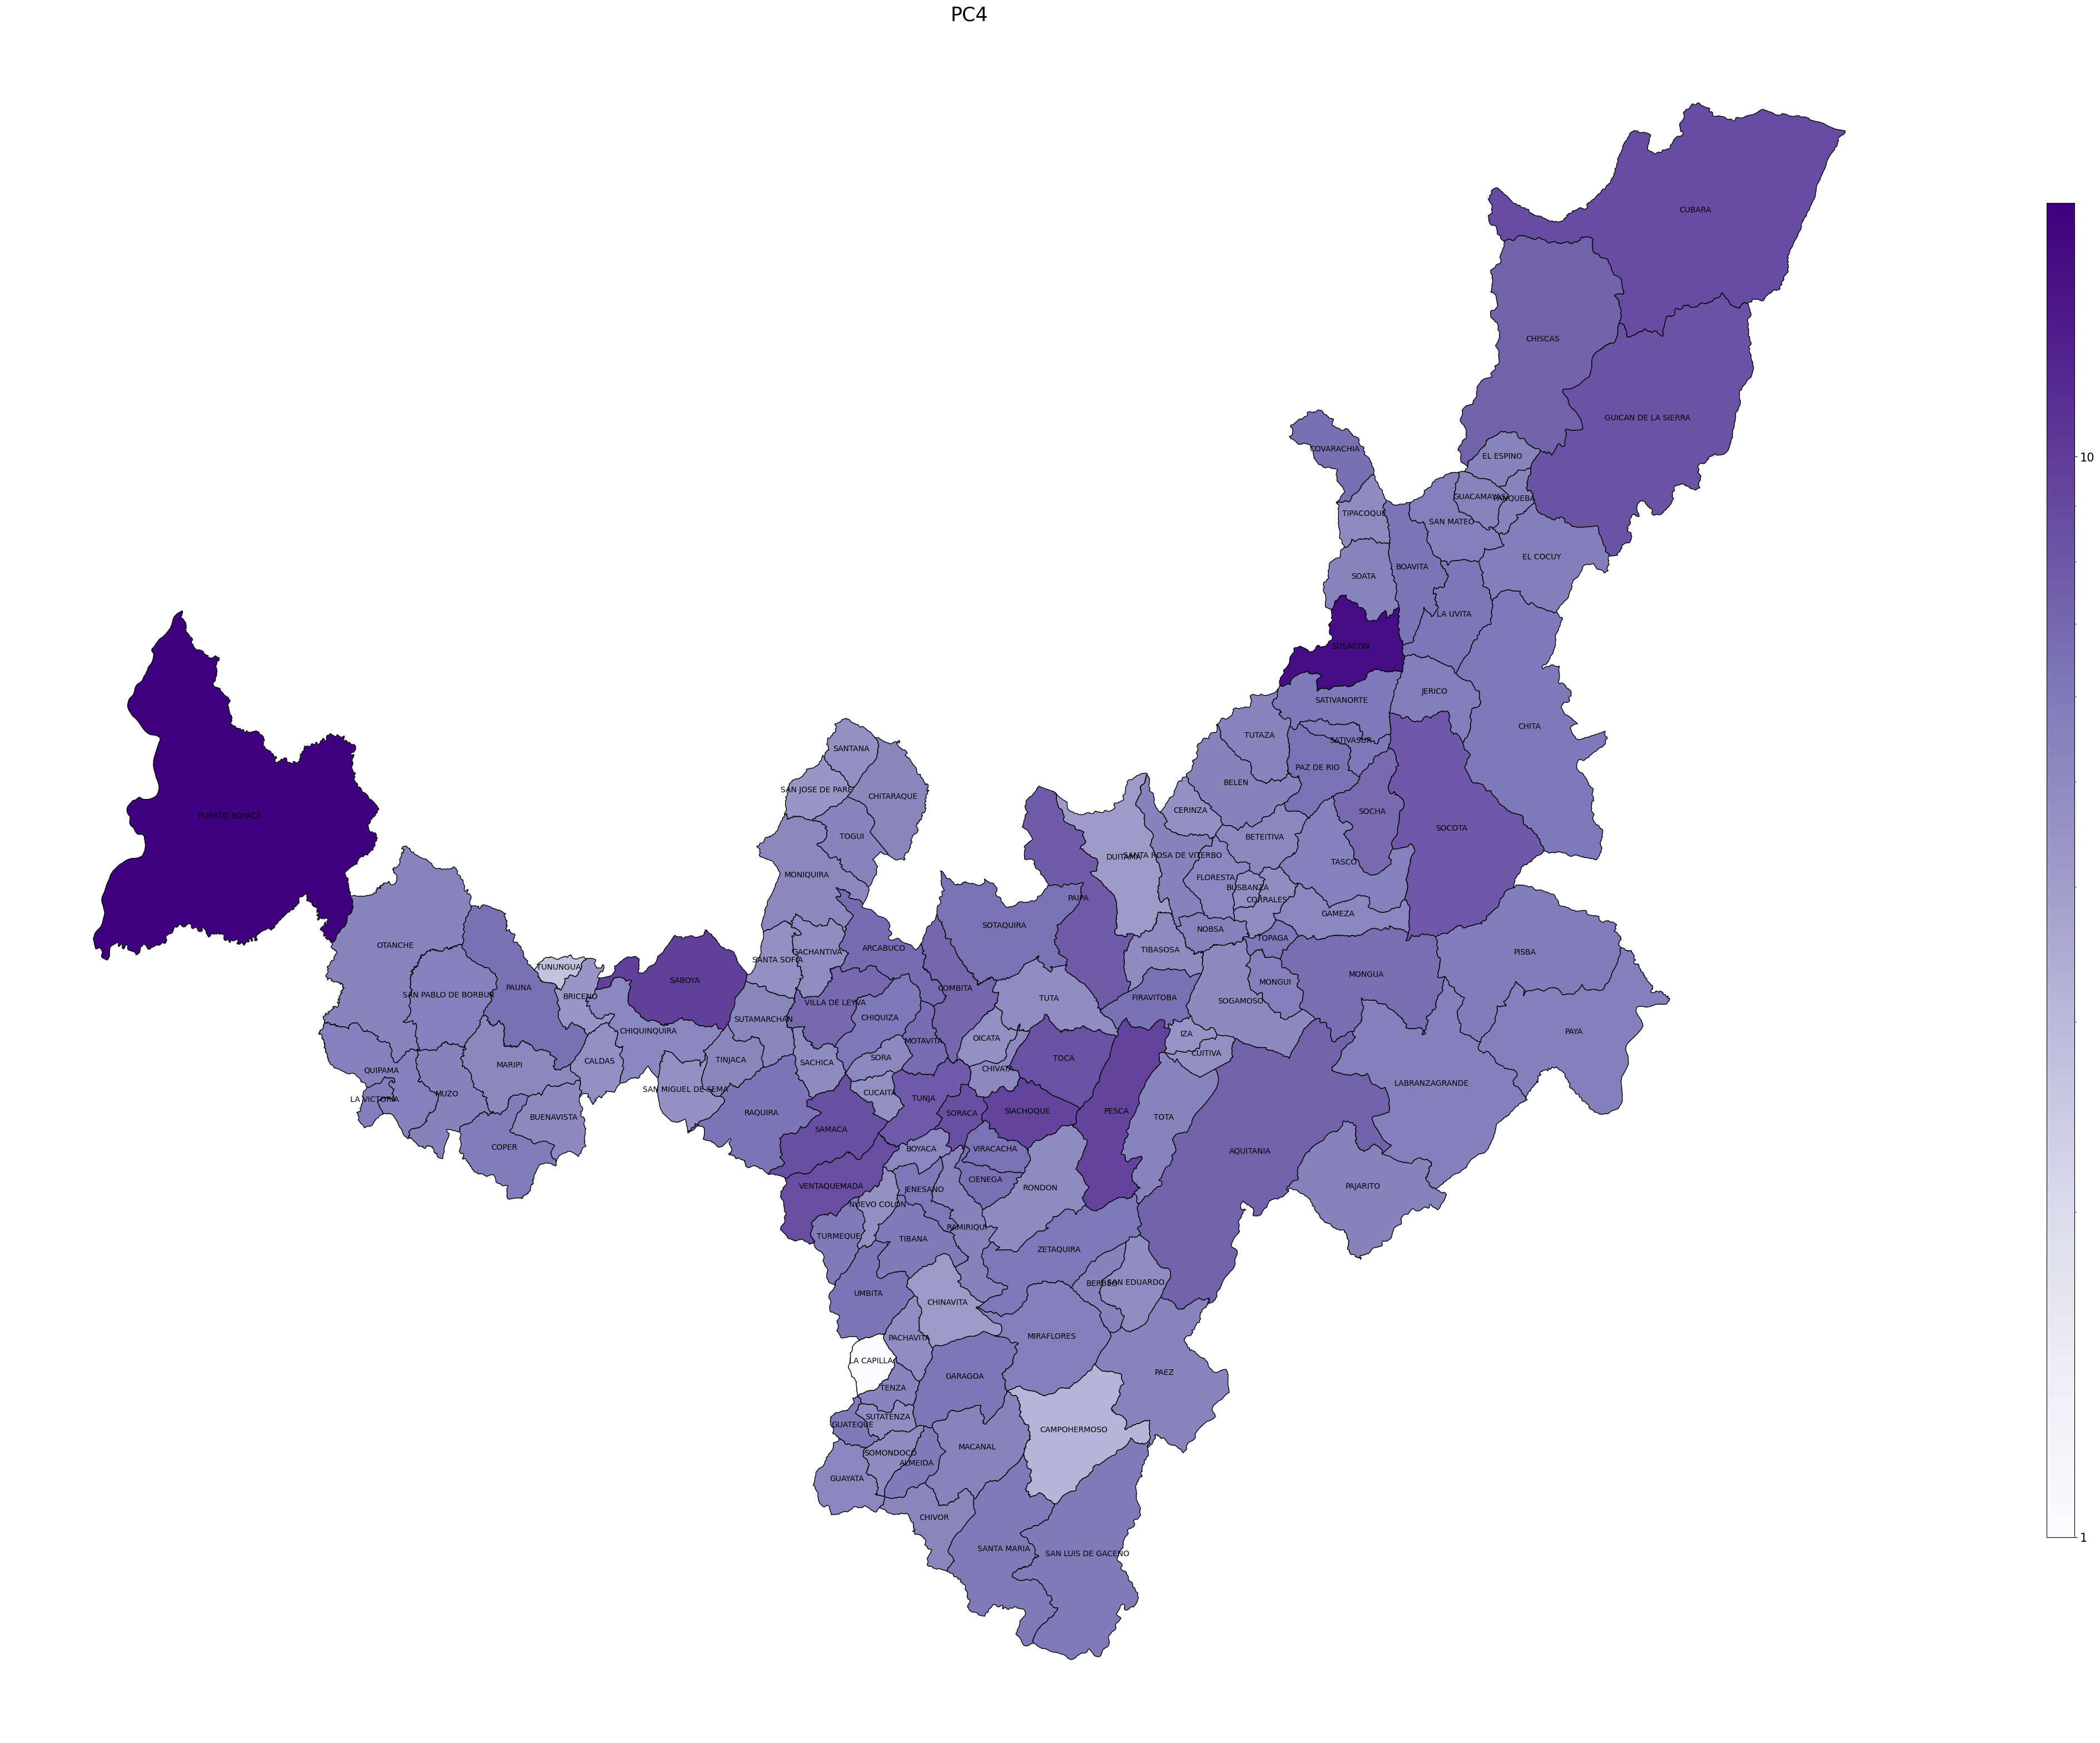

In [ ]:

# Creando una figura en matplotlib y ajustando el tamaño deseado
fig, ax = plt.subplots(1, figsize=(50, 40))

# Plotear el mapa utilizando los datos de df1 y la columna FACTOR 4
df1.plot(
    column='Factor 4',
    legend=False,
    cmap='Purples',
    ax=ax,
    linewidth=1,  # Ajustando el grosor de las líneas del mapa
    edgecolor='black'  # Color de las líneas del mapa
)

# Obtener los valores mínimos y máximos reales de la columna FACTOR 4
vmin = df1['Factor 4'].min()
vmax = df1['Factor 4'].max()

# Verificar si los valores mínimos y máximos son válidos
if vmin <= 0:
    vmin = 1  # Si el mínimo es menor o igual a cero, se establece a 1

# Agregando etiquetas de municipios
for idx, row in df1.iterrows():
    ax.annotate(text=row['key_0'], xy=(row.geometry.centroid.x, row.geometry.centroid.y), color='black', fontsize=10, ha='center')

# Agregando barra de color a través de matplotlib

# Ajustando posición y dimensiones de la barra
cax = fig.add_axes([0.9, 0.2, 0.01, 0.6])
# Atributos de la barra de color
sm = plt.cm.ScalarMappable(
    cmap='Purples',
    norm=mplc.LogNorm(vmin=vmin, vmax=vmax)
)
sm._A = []

# OPCIONAL
# Formateando los números a absolutos de lo contrario salieran a base 10
formatter = ticker.LogFormatter(10, labelOnlyBase=False)
cbr = fig.colorbar(
    sm,
    cax=cax,
    format=formatter,
    ticks=[1, 10, 100]
)

ax.set_title('PC4', fontsize=25)

cbr.ax.tick_params(labelsize=15)  # Tamaño de letra de las legendas

ax.axis('off')  # Desactivando los ejes de posicionamiento

plt.show()

El mapa revela los municipios con una mayor actividad primaria, lo que implica una mayor explotación de recursos naturales, ya sea en agricultura, minería, explotación petrolera, entre otros. Esta distinción es notable en comparación con el factor relacionado con el cultivo de papa, donde Puerto Boyacá tenía una puntuación baja. Sin embargo, en este nuevo factor, Puerto Boyacá muestra un alto puntaje debido a la presencia de cinco campos petroleros. Esta región se encuentra estratégicamente ubicada cerca del centro, sur y oriente del país, lo que la convierte en un punto focal para la producción de crudo en Colombia, concentrando cerca del 80.0% de la producción total del país. Es esta explotación petrolera la que contribuye significativamente al alto puntaje en este factor para Puerto Boyacá.